In [1]:
cd ../analysis/

/srv/data/home/jlee782/segmentation/analysis


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
# from paper_visualizations import * 
from PixelEM import * 
# from test_sample import test_sample_obj
from withClustAnalysis import *

Populating the interactive namespace from numpy and matplotlib


/home/jlee782/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
# compile all algo and MV PRJs into one big table
df = compile_all_algo_PRJs()

In [6]:
# df.groupby(["objid","sample_num","num_workers"])

In [12]:
selected_df = df[(df["num_workers"]==25)&(df["sample_num"]==0)&(df["objid"]==1)&(df["clust"]==0)]

In [49]:
sample = "25workers_rand0"
objid=1
#thresh_lst=[-4,-2,0,2,4,8,10]
thresh_lst=np.arange(-15,70,1)
cluster_id=0
all_prjs = deriveGTinGroundTruthExperiments(sample, objid, "GT",thresh_lst,cluster_id = cluster_id, exclude_isovote=False,rerun_existing=True)
df = pd.DataFrame(all_prjs,columns=["thresh","p","r","j"])

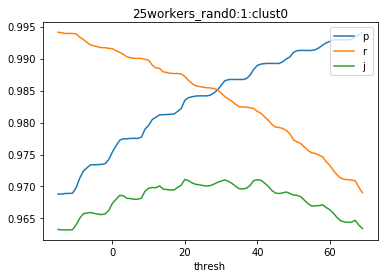

In [53]:
plt.title("{}:{}:clust{}".format(sample,objid,cluster_id))
plt.plot(df["thresh"],df["p"],label="p")
plt.plot(df["thresh"],df["r"],label="r")
plt.plot(df["thresh"],df["j"],label="j")
plt.xlabel("thresh")
plt.legend(loc="upper right")

In [57]:
sample = "25workers_rand0"
objid=1
#thresh_lst=[-4,-2,0,2,4,8,10]
thresh_lst=np.arange(-15,70,1)
cluster_id=0
def run_threshold_experiment(sample,objid,algo,thresh_lst,cluster_id):
    all_prjs = deriveGTinGroundTruthExperiments(sample, objid, algo,thresh_lst,cluster_id = cluster_id, exclude_isovote=False,rerun_existing=True)
    df = pd.DataFrame(all_prjs,columns=["thresh","p","r","j"])
    
    plt.figure()
    plt.title("{}:{}:clust{}".format(sample,objid,cluster_id))
    plt.plot(df["thresh"],df["p"],label="p")
    plt.plot(df["thresh"],df["r"],label="r")
    plt.plot(df["thresh"],df["j"],label="j")
    plt.xlabel("thresh")
    plt.legend(loc="upper right")

/home/jlee782/.local/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


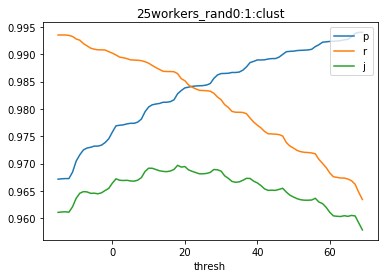

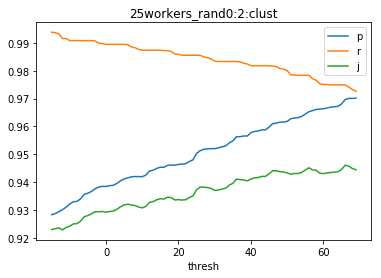

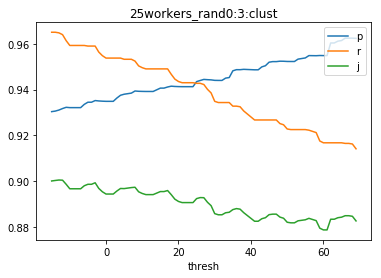

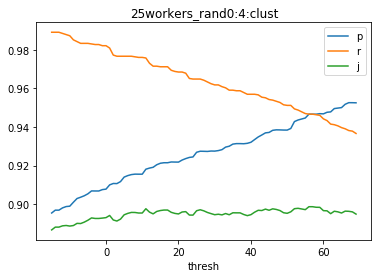

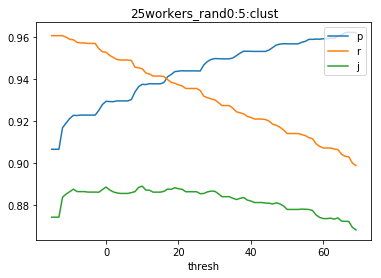

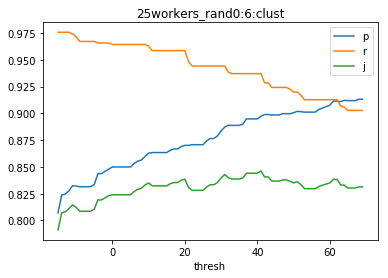

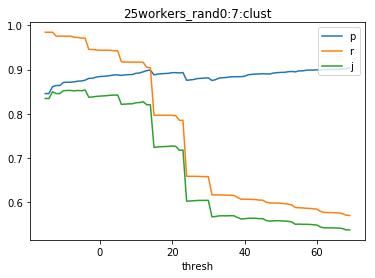

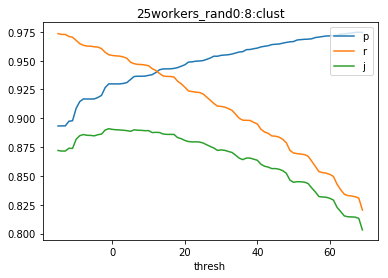

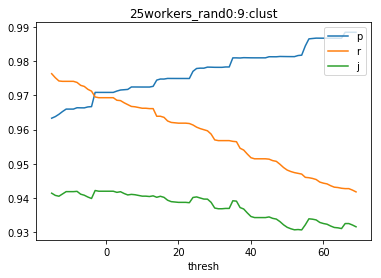

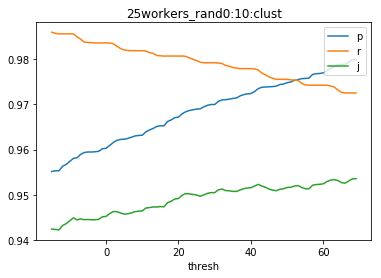

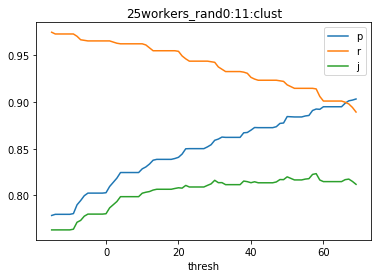

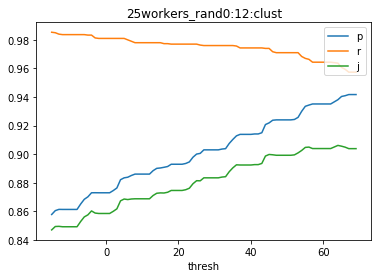

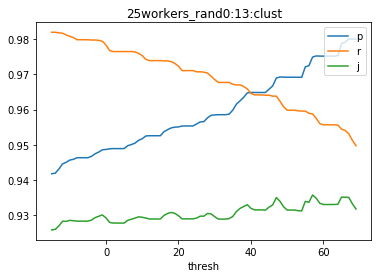

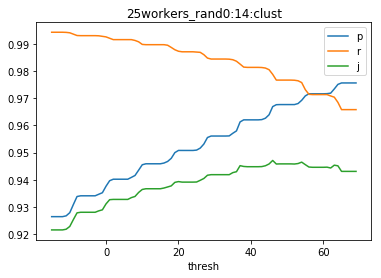

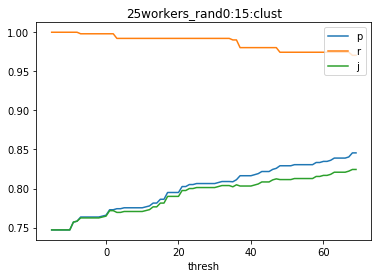

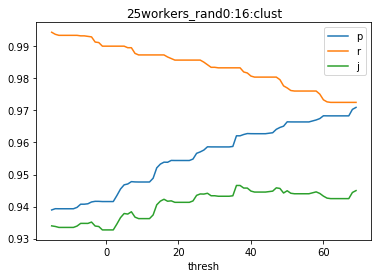

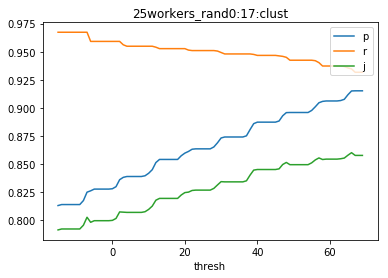

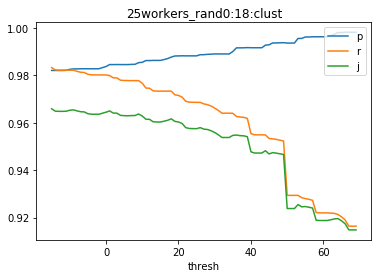

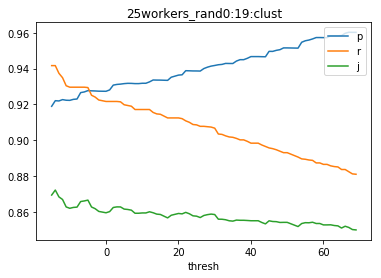

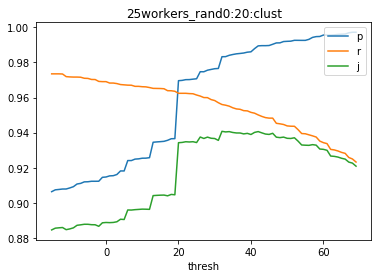

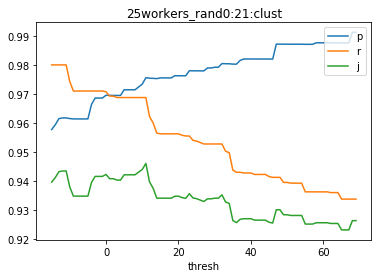

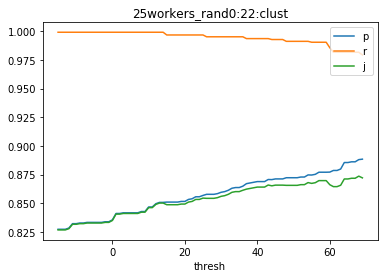

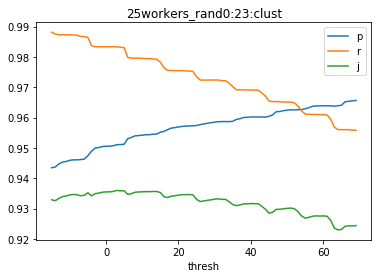

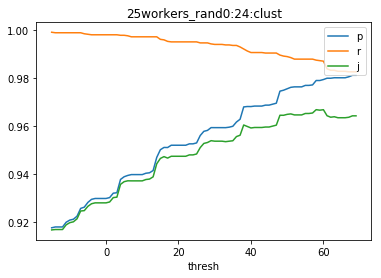

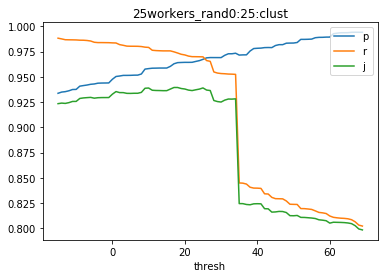

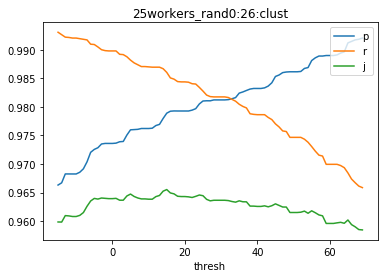

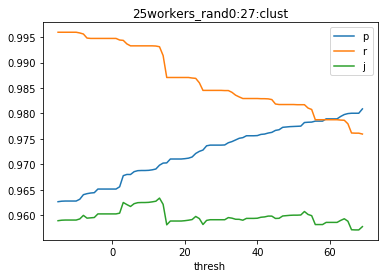

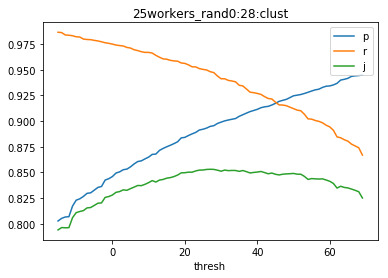

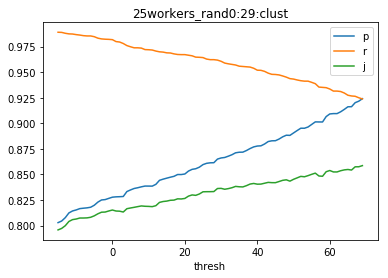

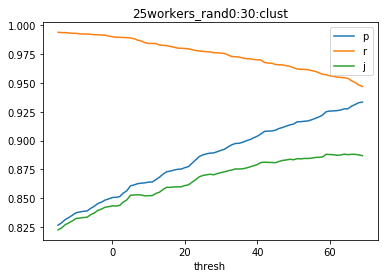

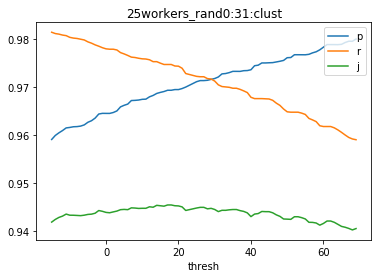

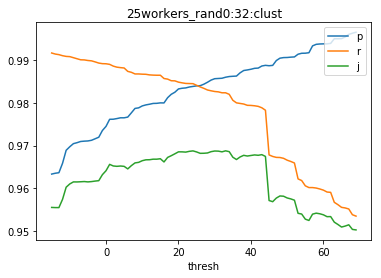

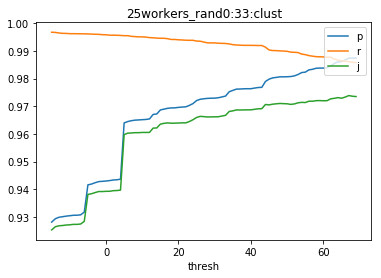

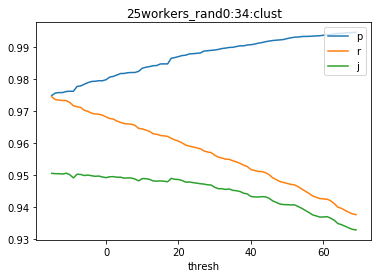

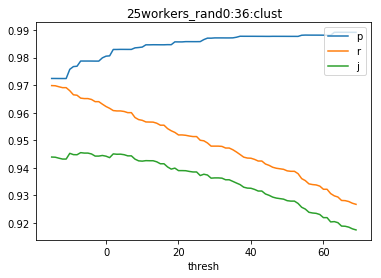

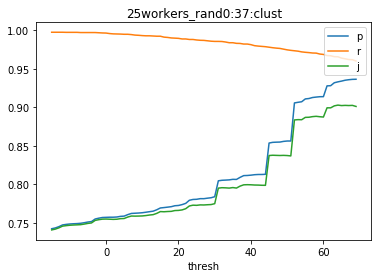

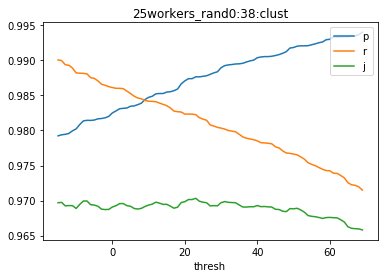

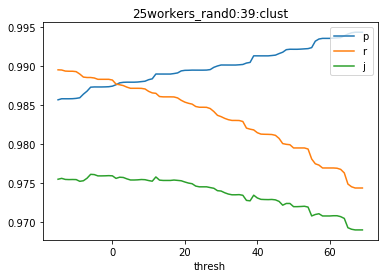

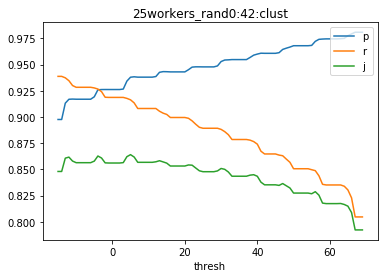

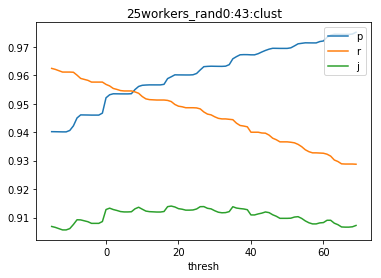

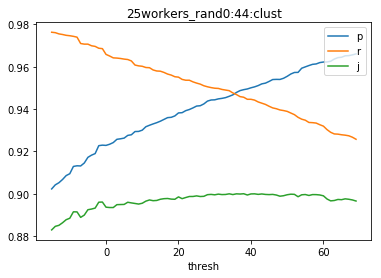

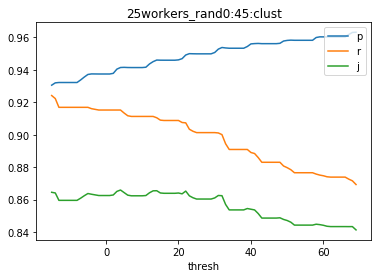

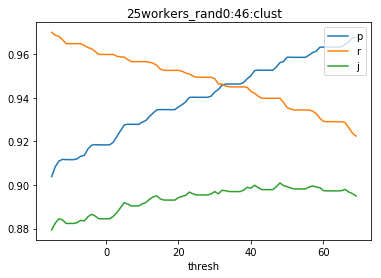

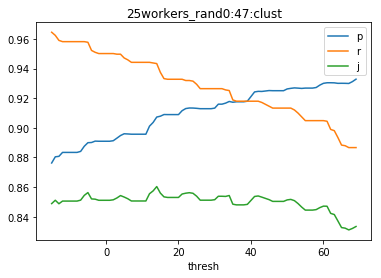

In [56]:
for objid in object_lst:
    run_threshold_experiment(sample,objid,"GT",thresh_lst,"")

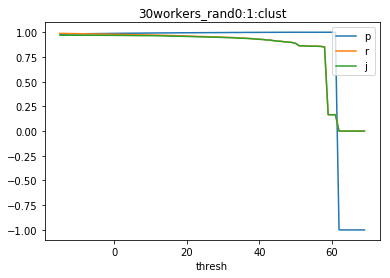

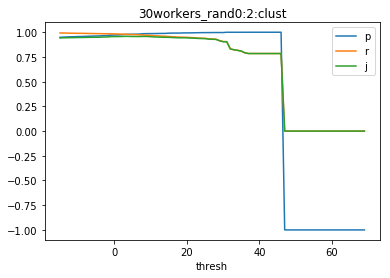

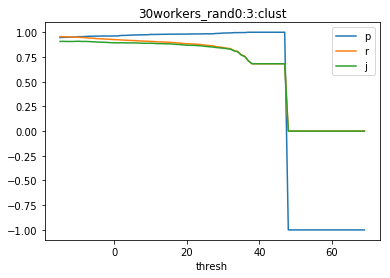

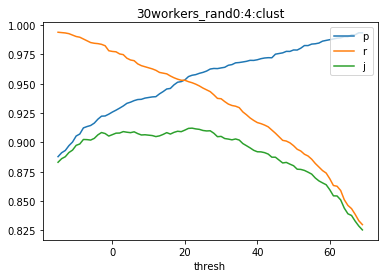

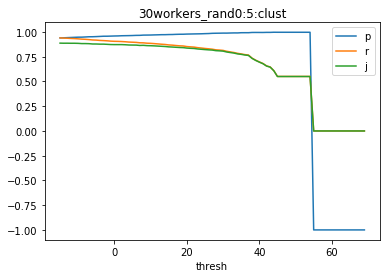

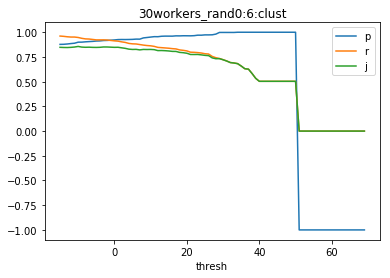

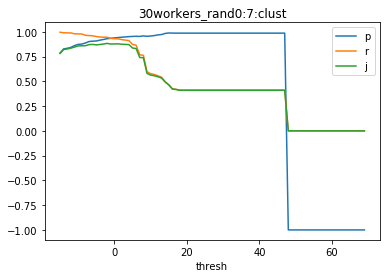

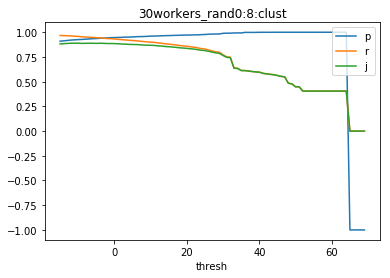

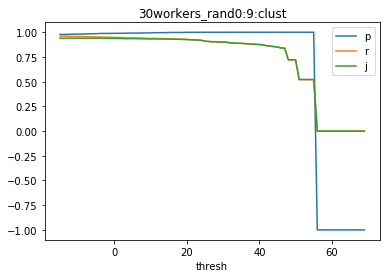

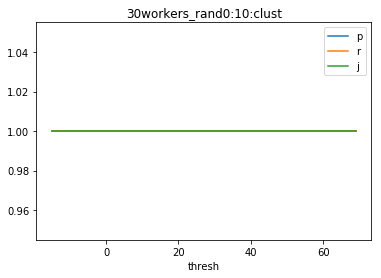

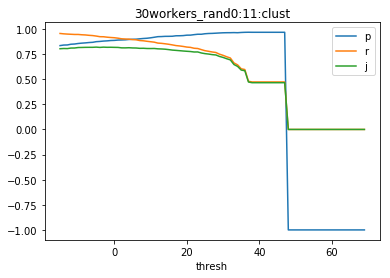

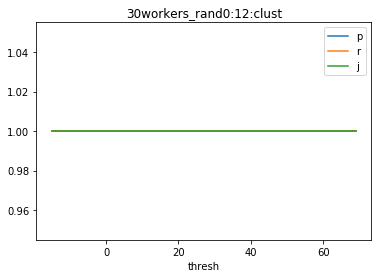

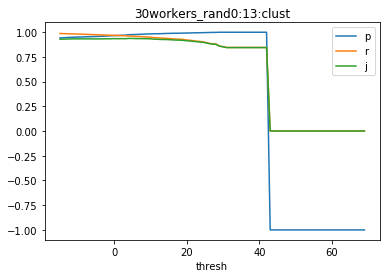

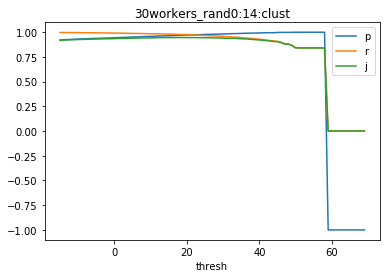

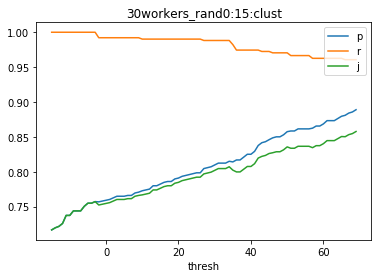

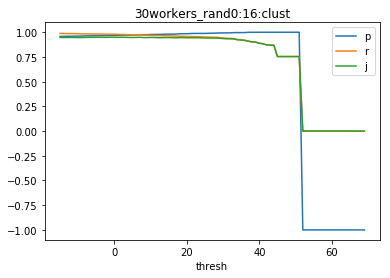

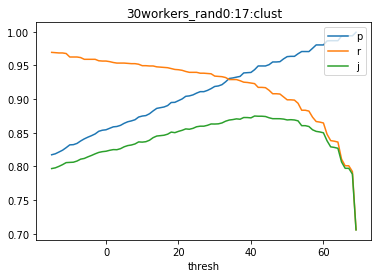

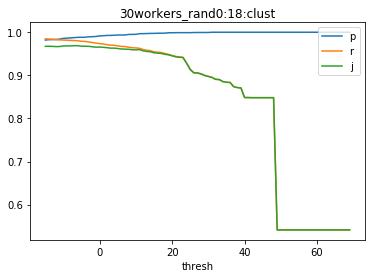

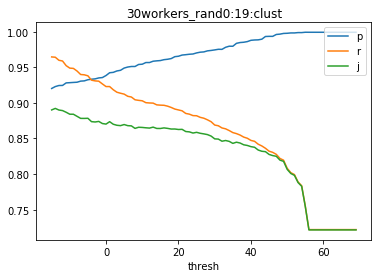

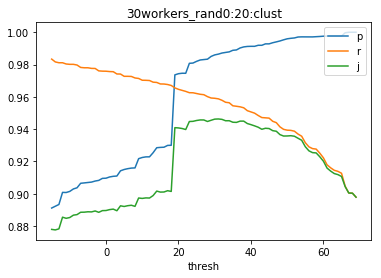

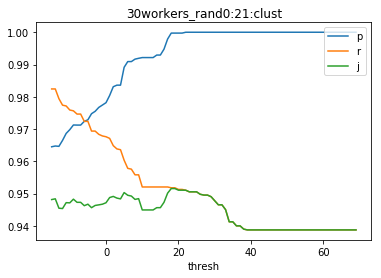

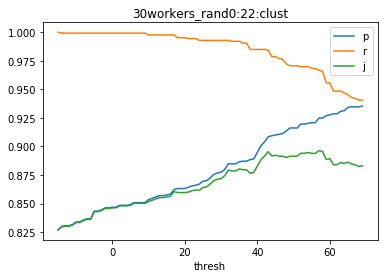

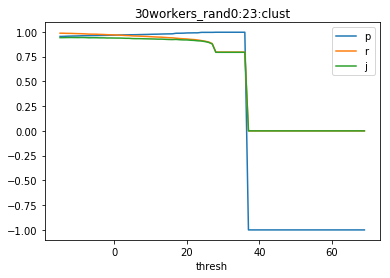

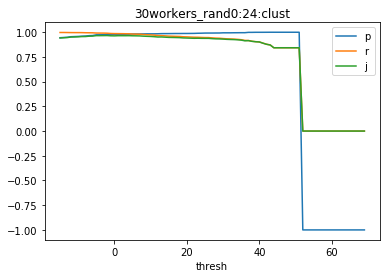

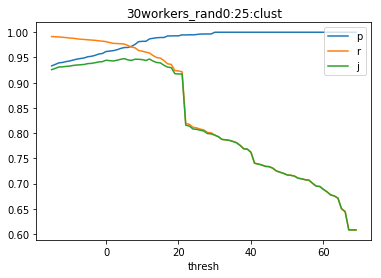

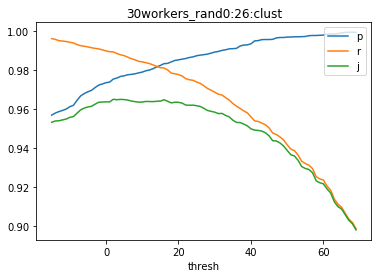

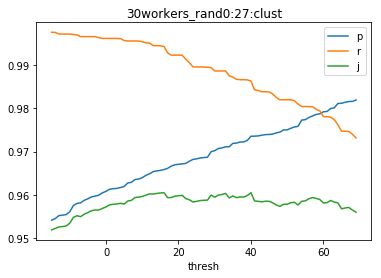

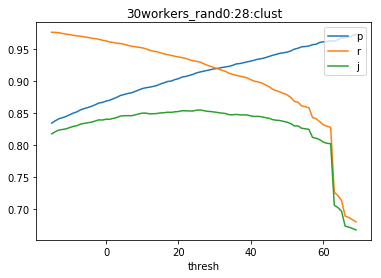

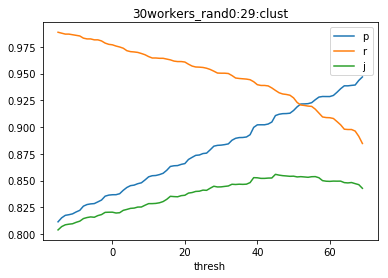

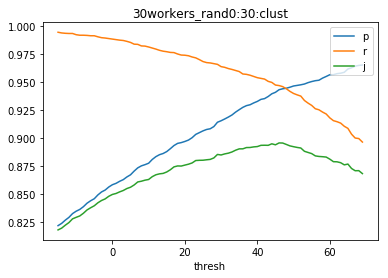

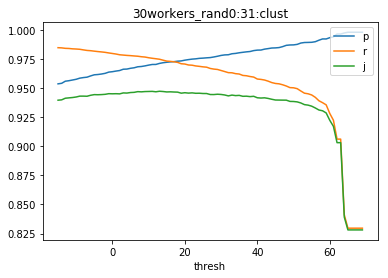

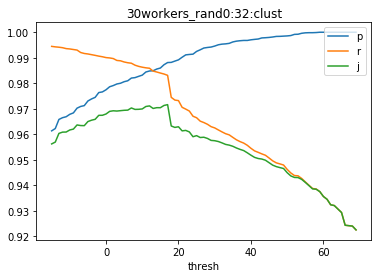

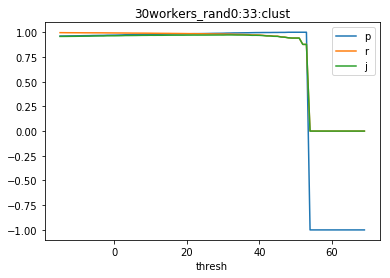

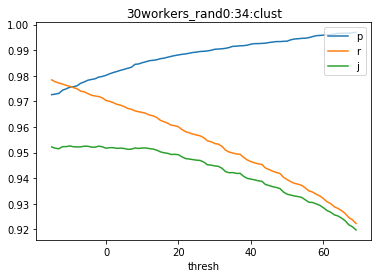

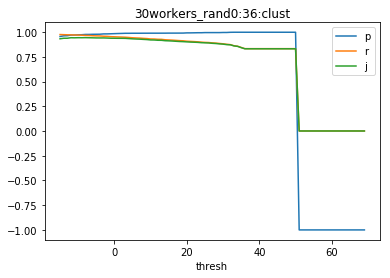

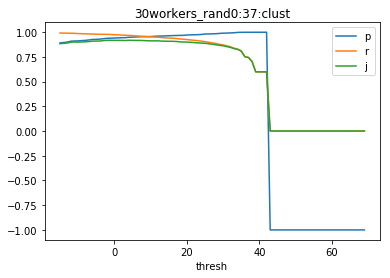

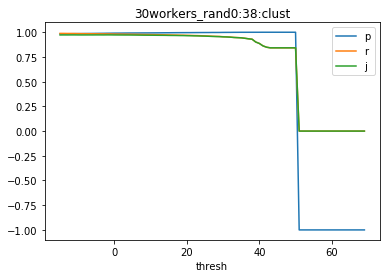

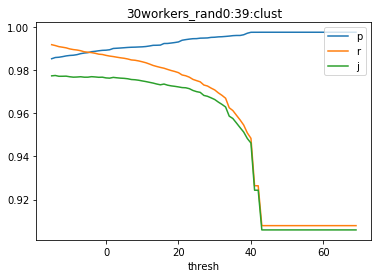

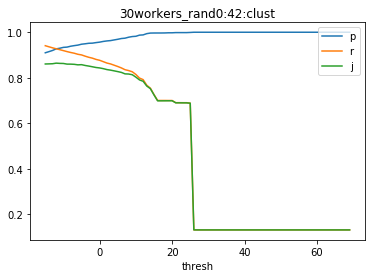

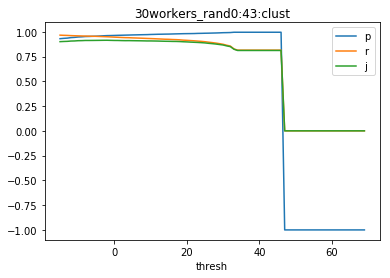

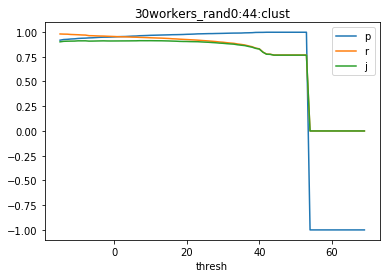

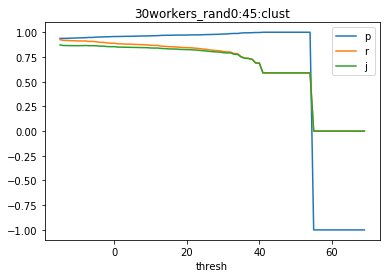

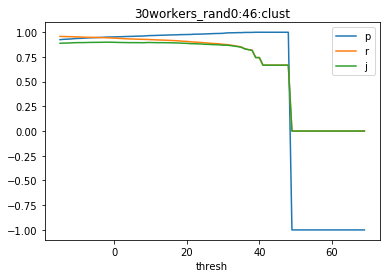

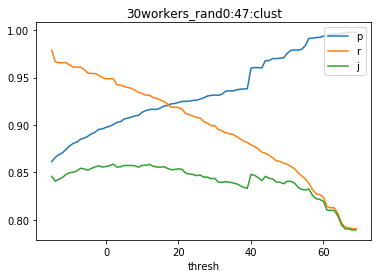

In [58]:
for objid in object_lst:
    run_threshold_experiment("30workers_rand0",objid,"GTLSA",thresh_lst,"")

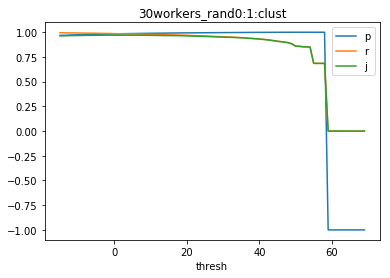

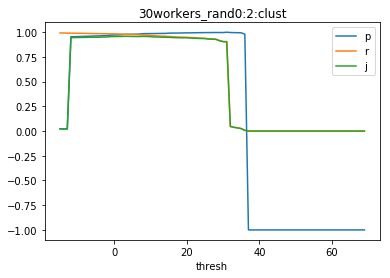

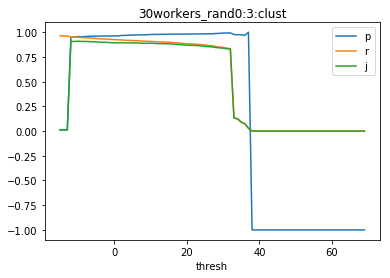

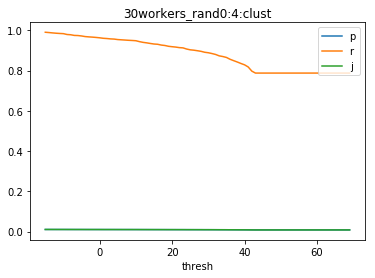

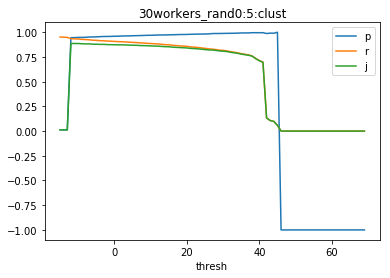

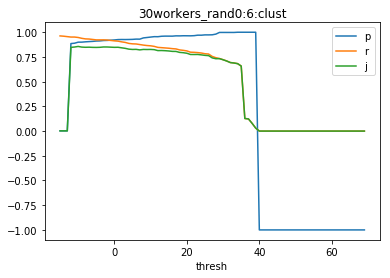

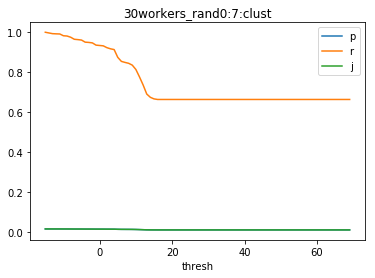

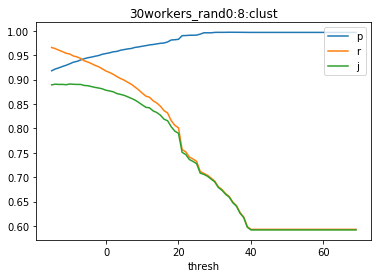

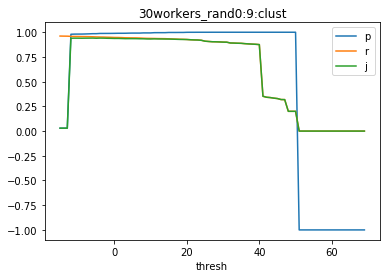

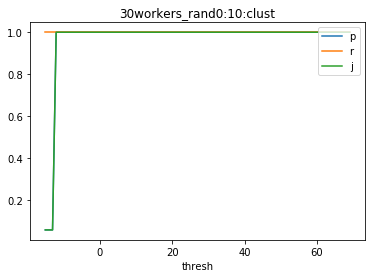

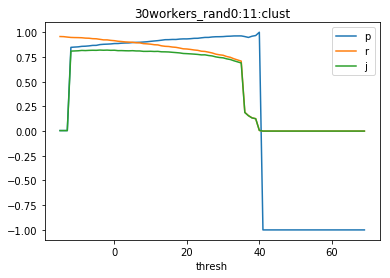

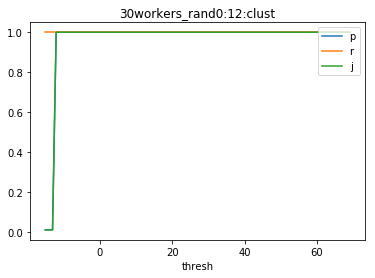

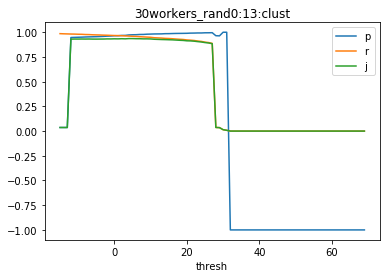

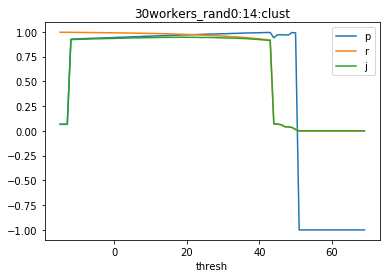

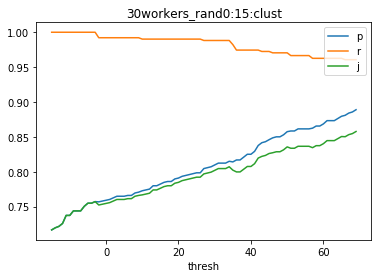

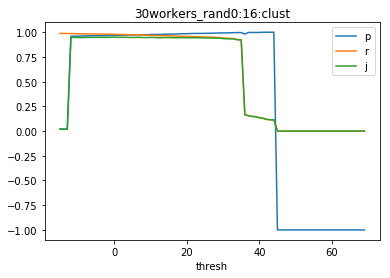

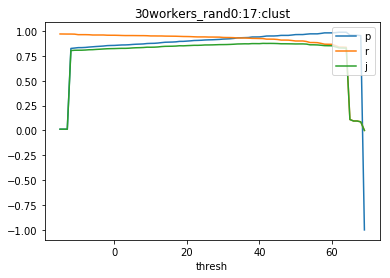

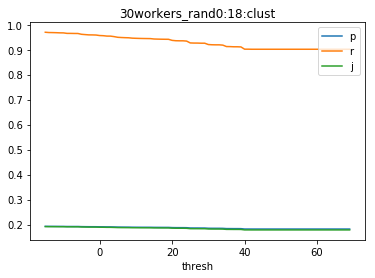

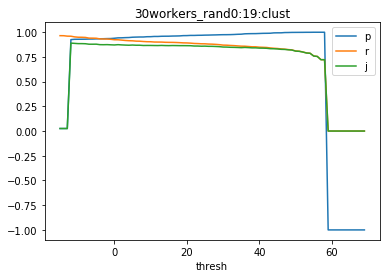

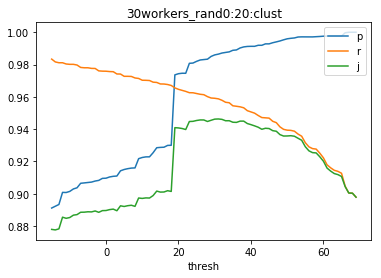

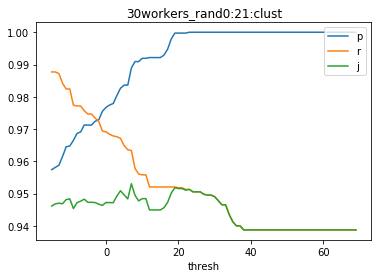

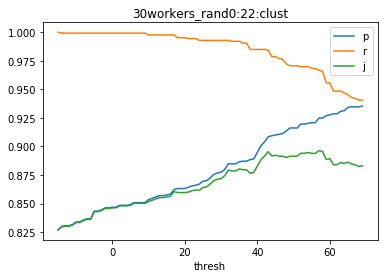

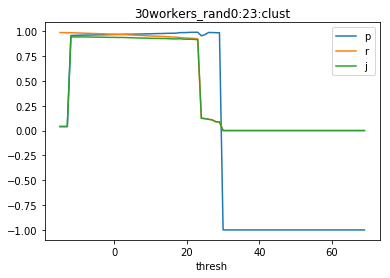

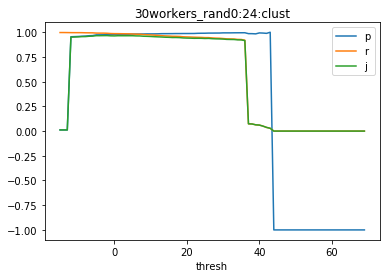

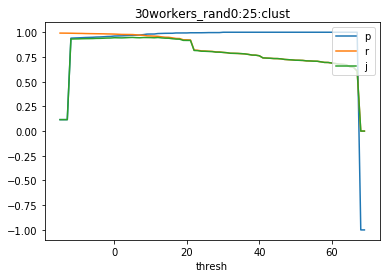

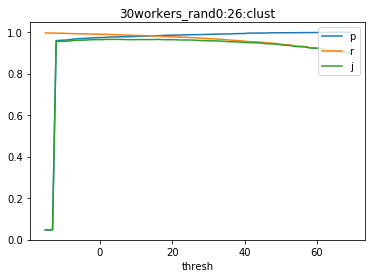

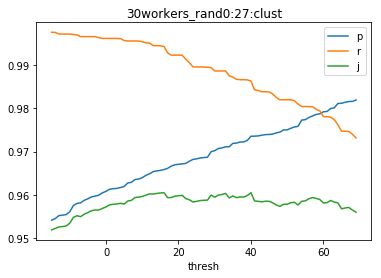

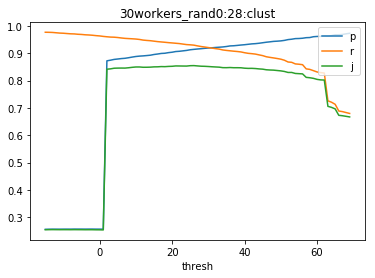

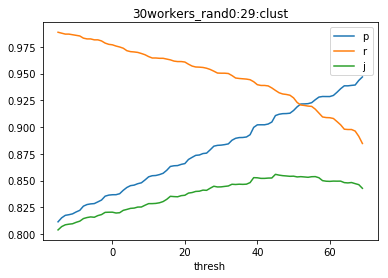

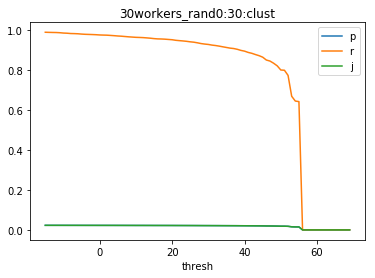

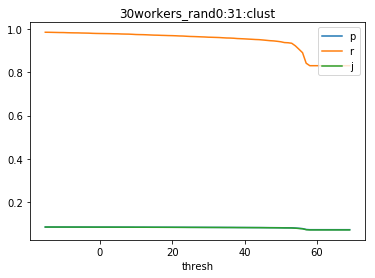

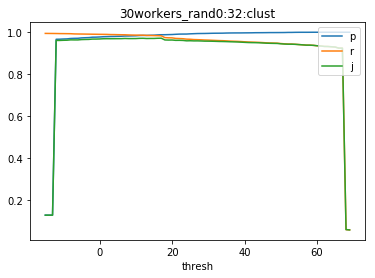

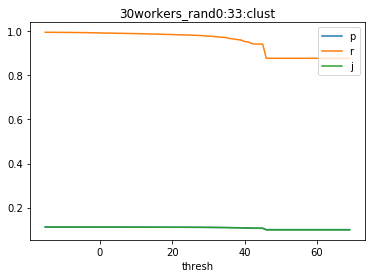

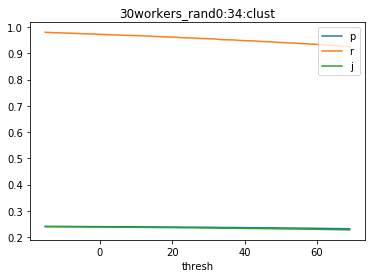

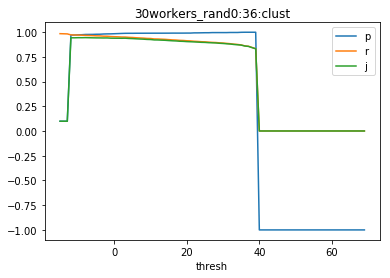

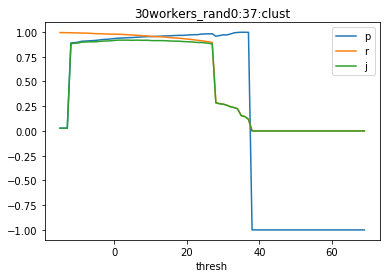

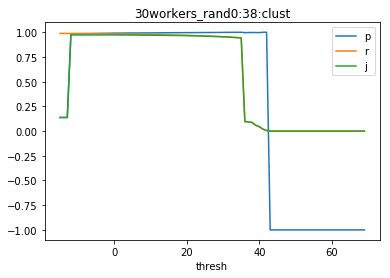

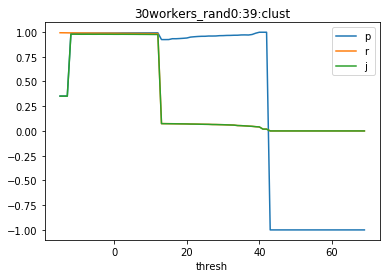

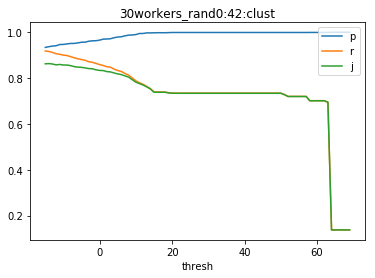

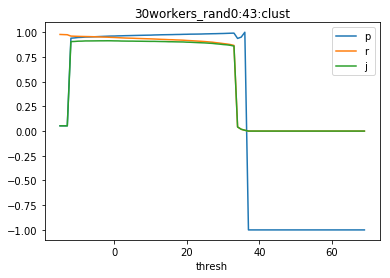

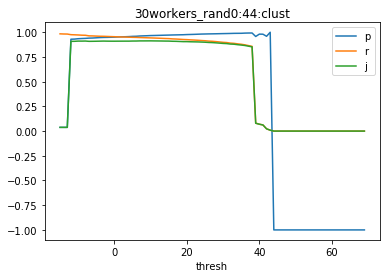

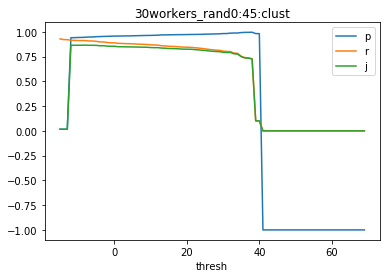

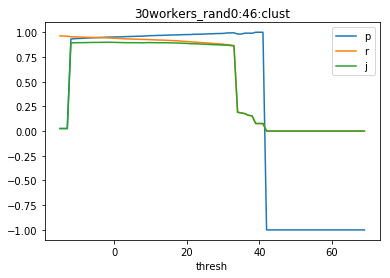

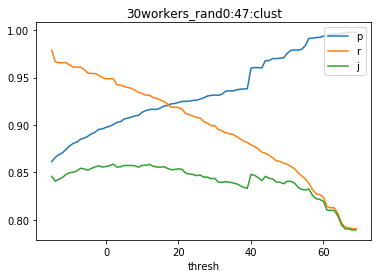

In [59]:
for objid in object_lst:
    run_threshold_experiment("30workers_rand0",objid,"isoGTLSA",thresh_lst,"")

# Online Binary search

In [4]:
sample = "25workers_rand0"
objid=1
#thresh_lst=[-4,-2,0,2,4,8,10]
thresh_lst=np.arange(-15,70,1)
cluster_id=0
algo = "GTLSA"
all_prjs = deriveGTinGroundTruthExperiments(sample, objid, algo,thresh_lst,cluster_id = cluster_id, exclude_isovote=False,rerun_existing=True)
df = pd.DataFrame(all_prjs,columns=["thresh","p","r","j"])

In [166]:
track = []
thresh_min = -200
thresh_max = 200

delta = np.abs(thresh_max -thresh_min)
p = 0
r = inf
#while(np.abs(p-r)>1e-5):
prev_p =inf
prev_r = 0
#while(delta>50):
while (abs(prev_p-p)>1e-3 or abs(prev_r-r)>1e-3):
    prev_p = p
    prev_r = r
    thresh = (thresh_min+thresh_max)/2.
    p,r,j = onlineDeriveGTinGroundTruthExperiments(sample, objid, algo,thresh,cluster_id="",exclude_isovote=False)
    delta = np.abs(thresh_max -thresh_min)
    if p>r:
        right = thresh_min + 0.75*delta  
        thresh_max = right
    else: 
        left = thresh_min + 0.25*delta  
        thresh_min = left
    track.append([i,thresh, p,r,thresh_min,thresh_max])
    print abs(prev_p-p) ,abs(prev_r-r)

0.987862207152 inf
0.167689928373 0.0208906202261
0.159839078405 0.0113428047663
0.0139996751255 0.0251680415521
0.0094126985934 0.020432325084
0.013798139548 0.00901313779407
0.0118227192513 0.00599602810877
0.00509462854951 0.00721814848763
0.00385149574049 0.00542315918118
0.00281137065005 0.00366636113657
0.00226064199432 0.00286434463795
0.0013923772129 0.00202413687748
0.00106625129356 0.0012603116407
0.00106506302603 0.00168041552093
0.000846328161848 0.0012603116407
0.000323056249627 0.000992972807822


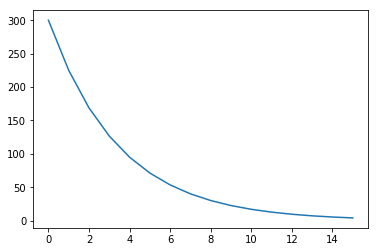

In [172]:
track = np.array(track)

deltas = np.abs(track[:,5]-track[:,4])

plt.plot(deltas)

In [170]:
idx = np.argsort(track[:,1])
ths =track[:,1][idx] 
ps = track[:,2][idx]
rs = track[:,3][idx]

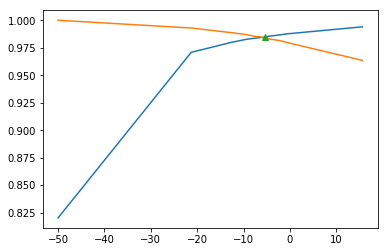

In [171]:
# for it,t in enumerate(track):
#     plt.plot(t[1],t[2],'o',ms=10/(it+1))
plt.plot(ths,ps,label="p")
plt.plot(ths,rs,label="r")
plt.plot(track[-1][1],track[-1][2],'^')

In [165]:
deltas

array([ 300.        ,  225.        ,  168.75      ,  126.5625    ,
         94.921875  ,   71.19140625,   53.39355469,   40.04516602])

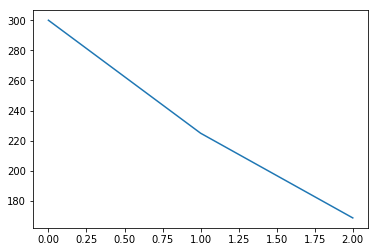

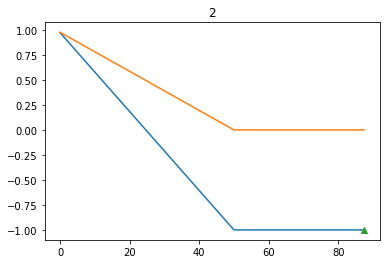

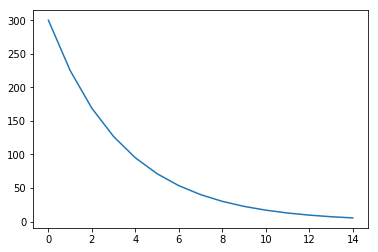

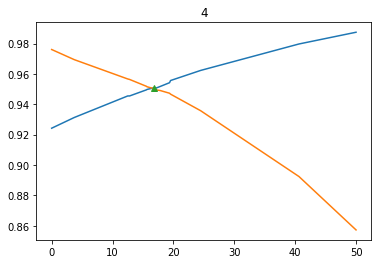

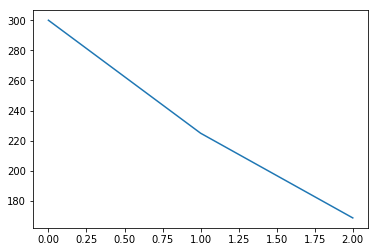

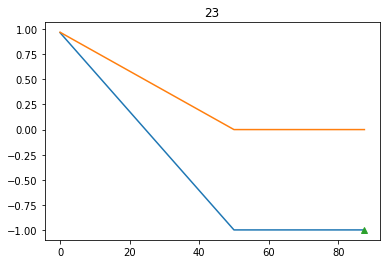

In [189]:
for objid in [2,4,23]:
    binary_search(sample, objid, algo,thresh,cluster_id="",exclude_isovote=False)

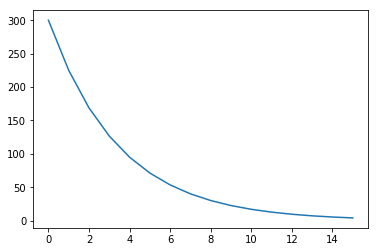

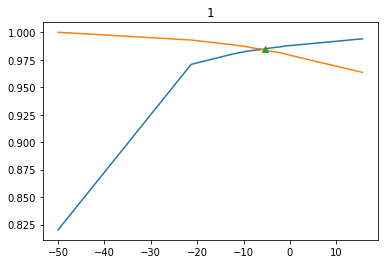

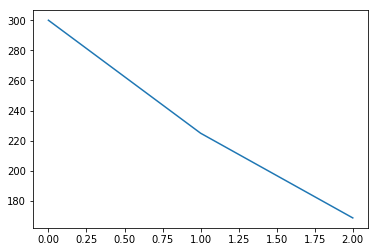

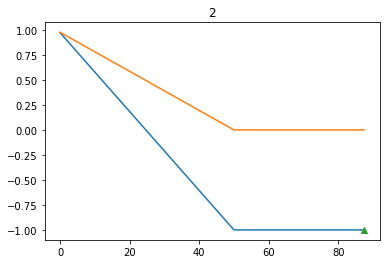

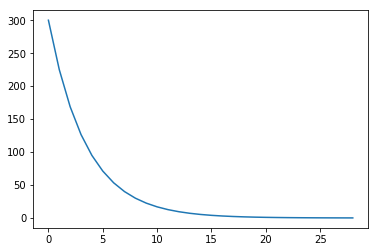

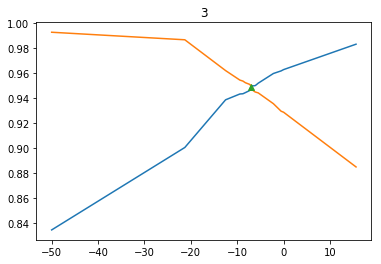

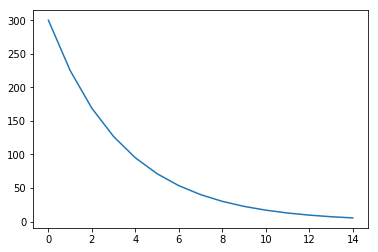

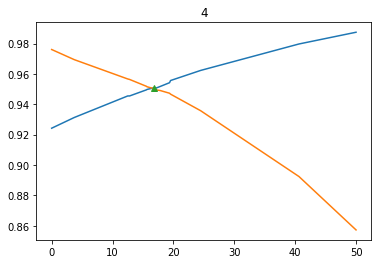

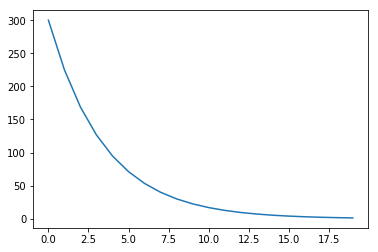

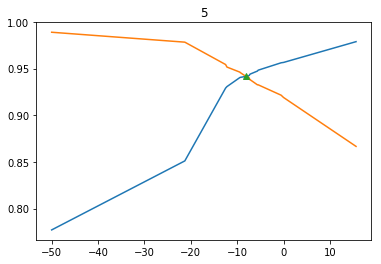

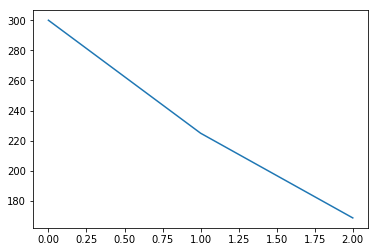

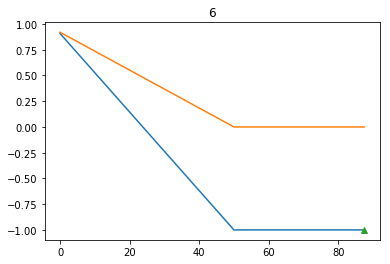

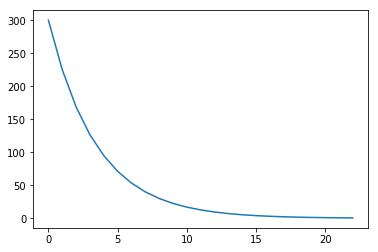

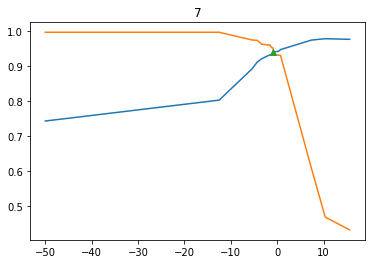

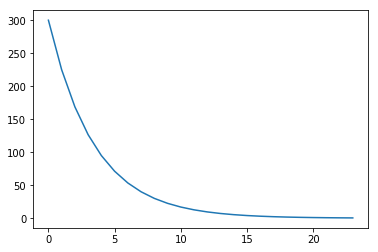

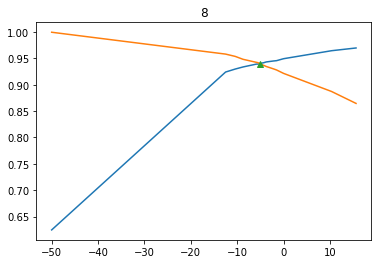

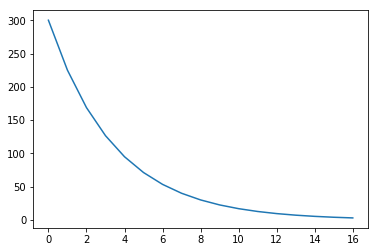

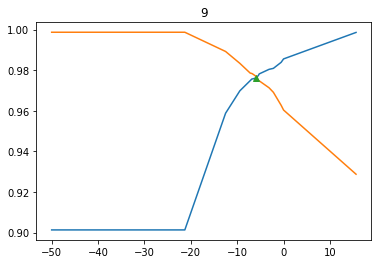

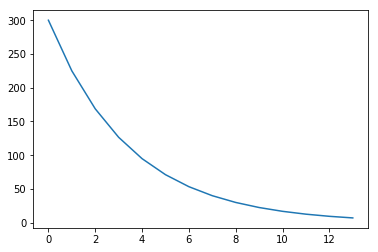

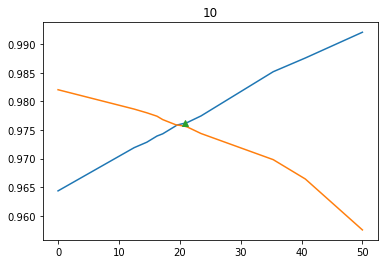

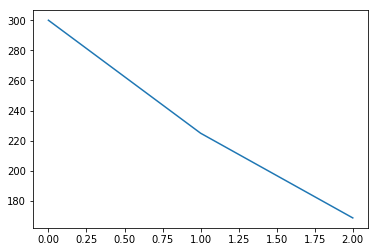

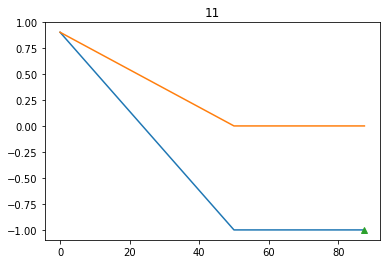

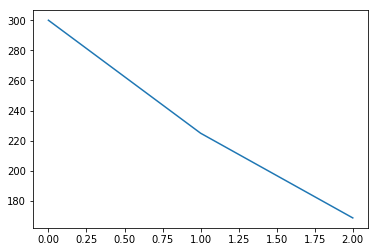

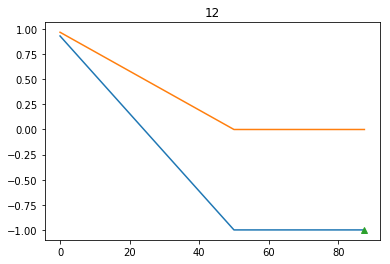

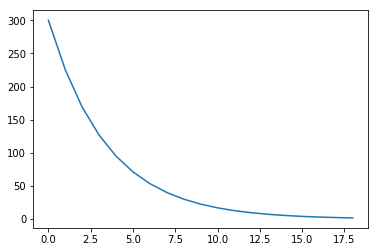

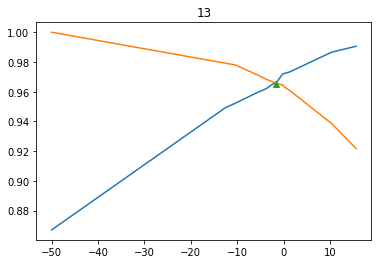

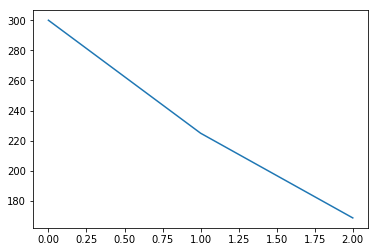

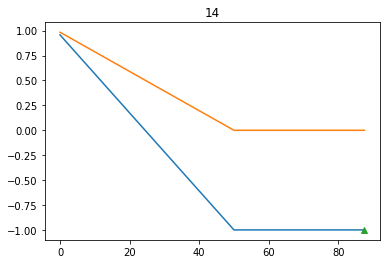

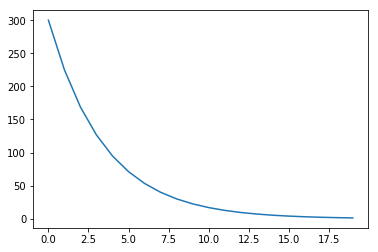

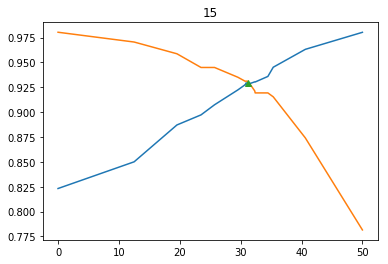

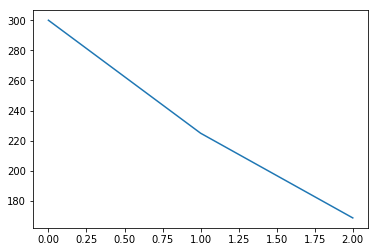

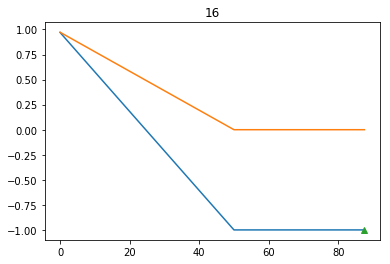

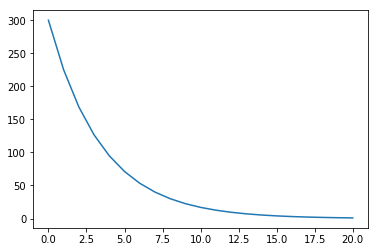

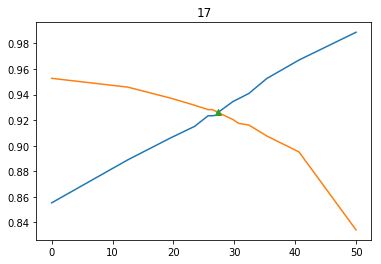

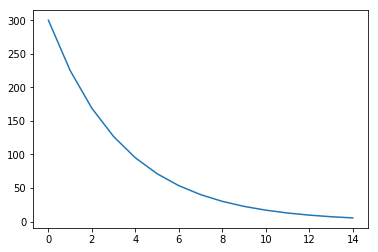

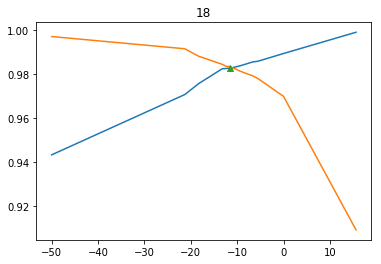

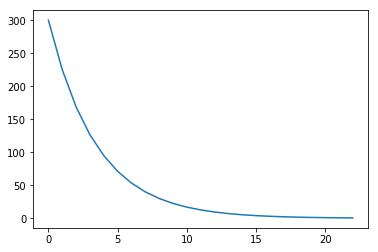

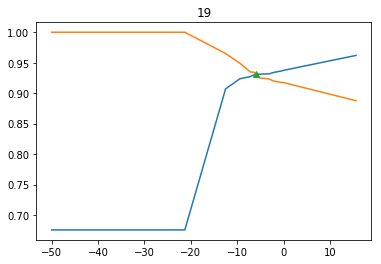

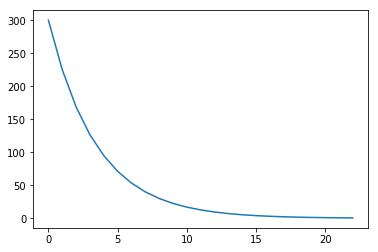

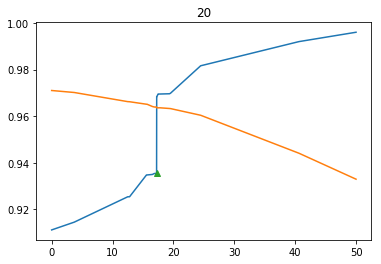

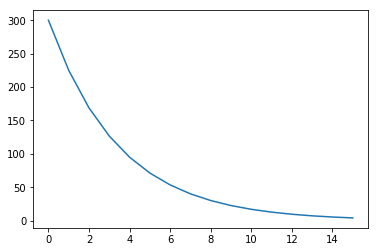

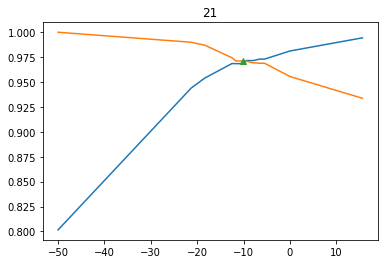

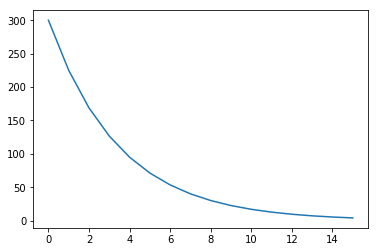

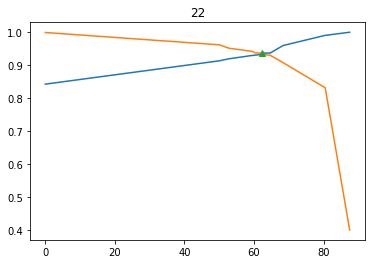

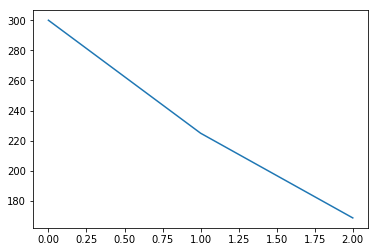

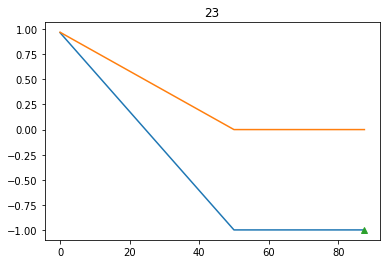

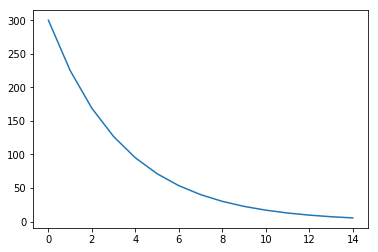

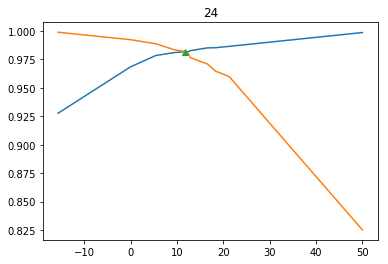

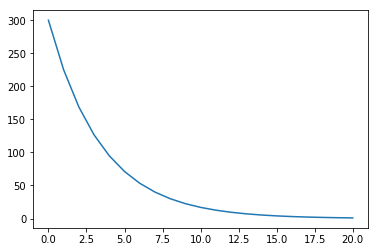

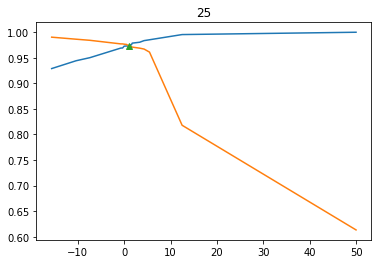

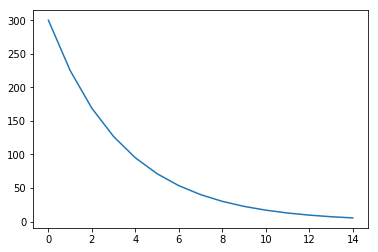

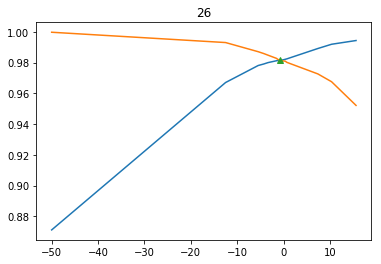

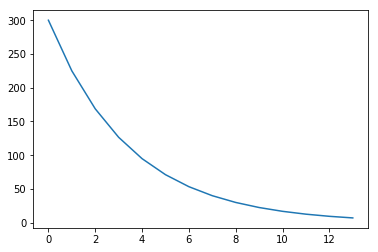

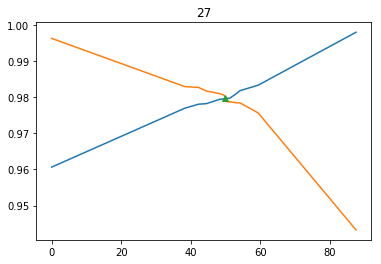

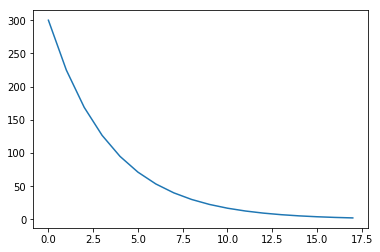

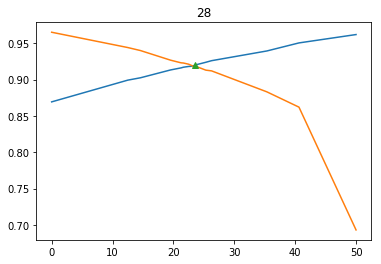

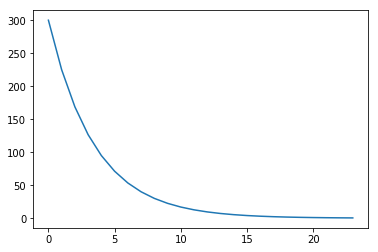

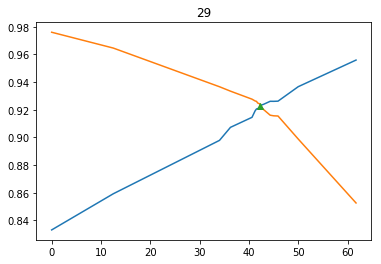

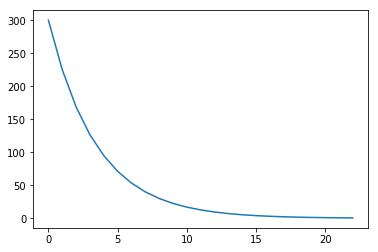

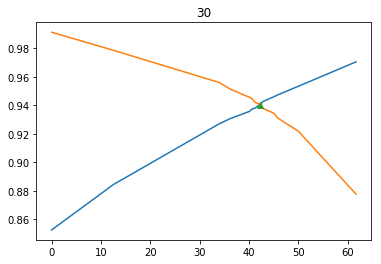

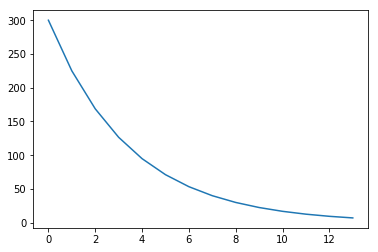

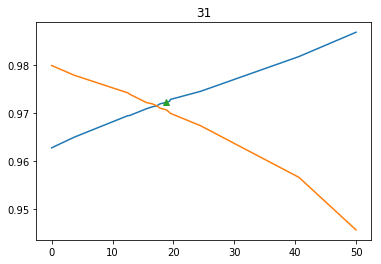

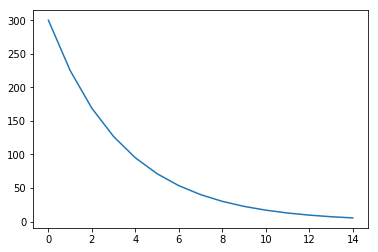

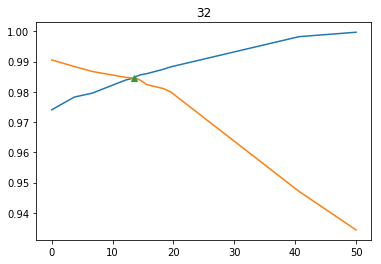

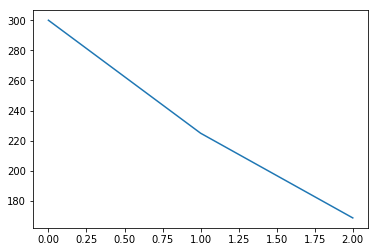

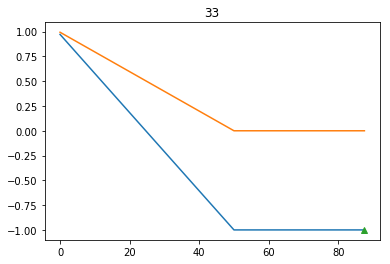

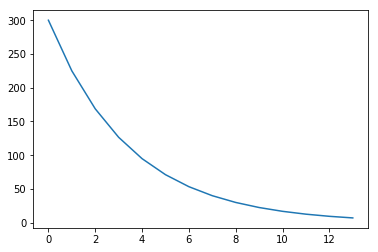

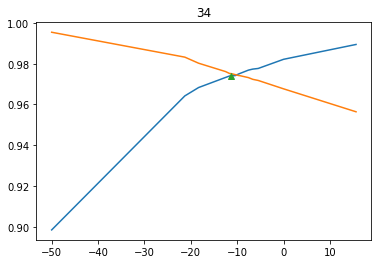

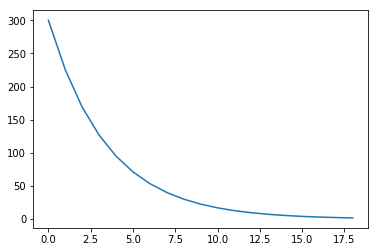

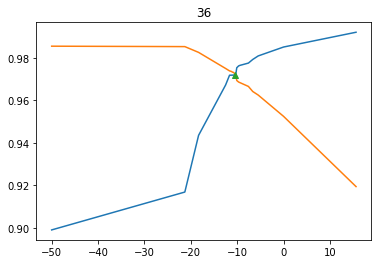

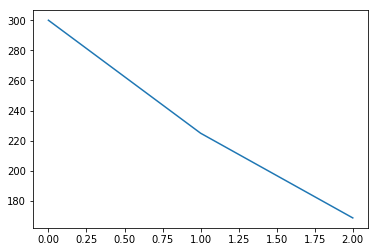

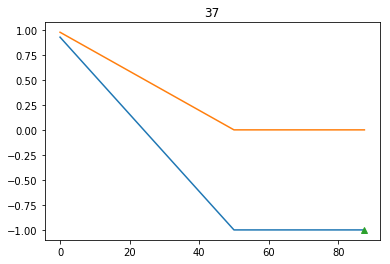

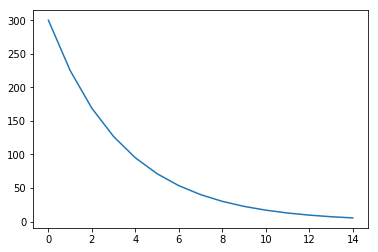

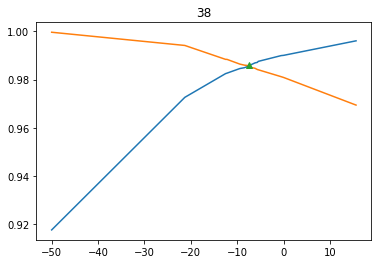

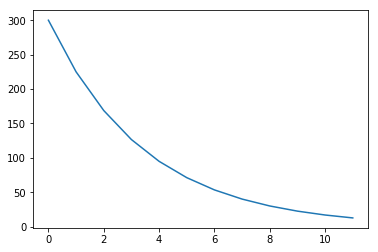

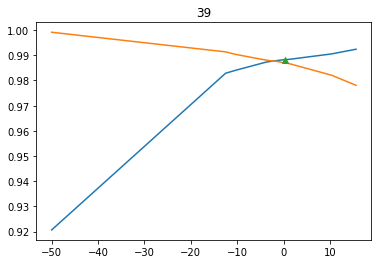

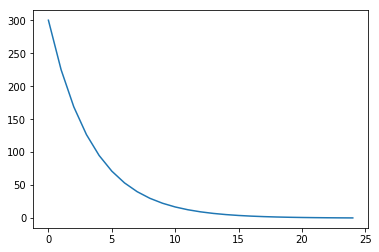

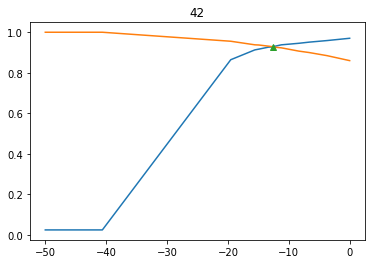

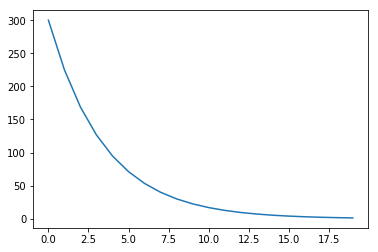

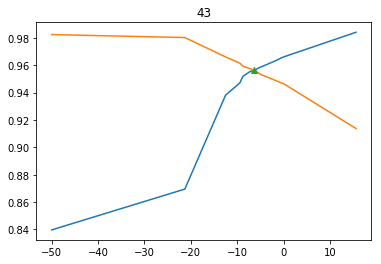

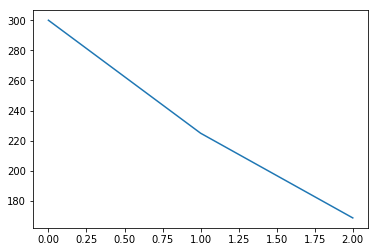

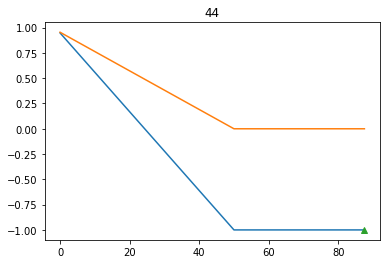

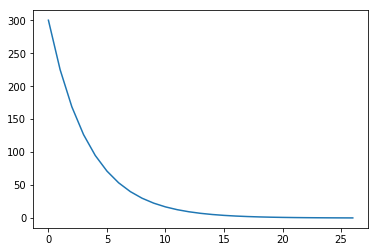

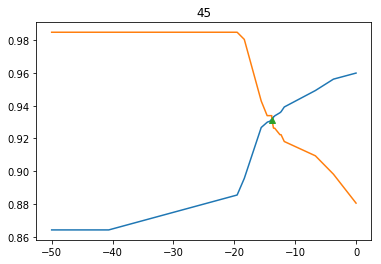

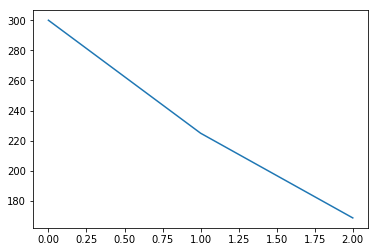

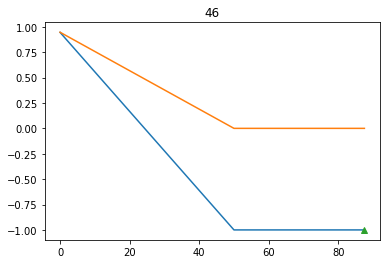

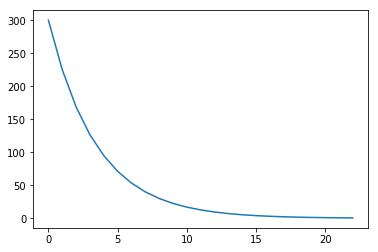

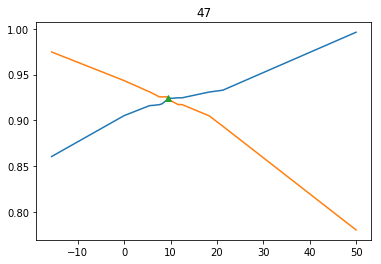

In [190]:
for objid in object_lst:
    binary_search(sample, objid, algo,thresh,cluster_id="",exclude_isovote=False)

I think there is a bug when one of p or r becomes -1. 

In [200]:
p,r,j = onlineDeriveGTinGroundTruthExperiments(sample, objid, algo,0,cluster_id="",exclude_isovote=False,rerun_existing=True)

In [202]:
p,r,j = onlineDeriveGTinGroundTruthExperiments(sample, objid, algo,50,cluster_id="",exclude_isovote=False,rerun_existing=True)

if p =-1 then it is because the result area is zero, which means nothing was selected for gt 

In [203]:
p,r,j

(-1, 0.0, 0.0)

In [253]:
def binary_search(sample, objid, algo,thresh,cluster_id="",exclude_isovote=False):
    track = []
    thresh_min = -200
    thresh_max = 200

    delta = np.abs(thresh_max -thresh_min)
#     p = 0
#     r = inf
#     prev_p =inf
#     prev_r = 0
    p,r =0,0 
    while (p==-1 or delta>1):
    #while (p==-1 or abs(prev_p-p)>1e-3 or abs(prev_r-r)>1e-3):

        prev_p = p
        prev_r = r
        thresh = (thresh_min+thresh_max)/2.
        #print "thresh:",thresh
        p,r,j = onlineDeriveGTinGroundTruthExperiments(sample, objid, algo,thresh,cluster_id=cluster_id,exclude_isovote=exclude_isovote,rerun_existing=True)
        
        delta = np.abs(thresh_max -thresh_min)
        if p>r:
            right = thresh_min + 0.75*delta  
            thresh_max = right
        else: 
            left = thresh_min + 0.25*delta  
            thresh_min = left
        if p==-1:
            #if p =-1 then it is because the result area is zero, which means nothing was selected for gt
            # this meant that the threshold has overshot
            thresh_max = thresh_min+0.2*delta
        track.append([i,thresh, p,r,thresh_min,thresh_max])
        #print "thresh min max:",thresh_min,thresh_max
        #print "p,r,j:",p,r,j
    track = np.array(track)
    deltas = np.abs(track[:,5]-track[:,4])
#     plt.figure()
#     plt.plot(deltas)
    idx = np.argsort(track[:,1])
    ths =track[:,1][idx] 
    ps = track[:,2][idx]
    rs = track[:,3][idx]
    plt.figure()
    plt.title(objid)
    plt.plot(ths,ps,label="p")
    plt.plot(ths,rs,label="r")
    plt.plot(track[-1][1],track[-1][2],'^')
    

thresh: 0.0
thresh min max: -100.0 200
p,r,j: 0.931222008957 0.968396540253 0.90375659733
thresh: 50.0
thresh min max: -25.0 35.0
p,r,j: -1 0.0 0.0
thresh: 5.0
thresh min max: -10.0 35.0
p,r,j: 0.944863800459 0.957751164338 0.907057340895
thresh: 12.5
thresh min max: -10.0 23.75
p,r,j: 0.964174991388 0.931137724551 0.9
thresh: 6.875
thresh min max: -1.5625 23.75
p,r,j: 0.949253731343 0.952095808383 0.905982905983
thresh: 11.09375
thresh min max: -1.5625 17.421875
p,r,j: 0.961078866507 0.936460412508 0.902243589744
thresh: 7.9296875
thresh min max: -1.5625 12.67578125
p,r,j: 0.953861584754 0.949101796407 0.907442748092
thresh: 5.556640625
thresh min max: 1.9970703125 12.67578125
p,r,j: 0.94696969697 0.956420492349 0.907799179034
thresh: 7.33642578125
thresh min max: 1.9970703125 10.0061035156
p,r,j: 0.951381951382 0.950432468397 0.906408629442
thresh: 6.00158691406
thresh min max: 3.99932861328 10.0061035156
p,r,j: 0.948030453492 0.952761144378 0.90546949099
thresh: 7.00271606445
thresh

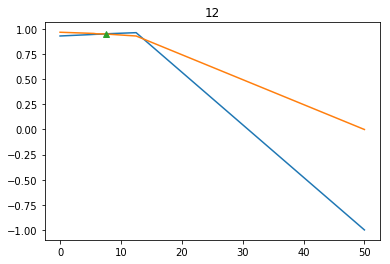

In [229]:
objid =12
binary_search(sample, objid, algo,thresh,cluster_id="",exclude_isovote=False)

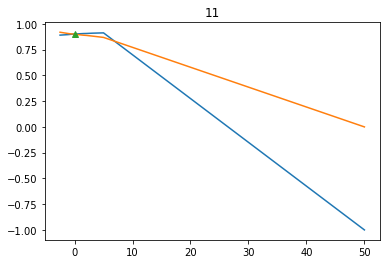

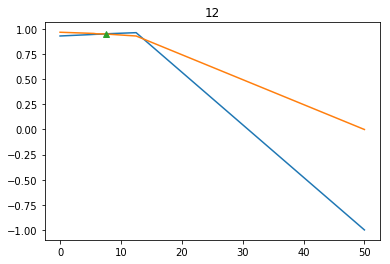

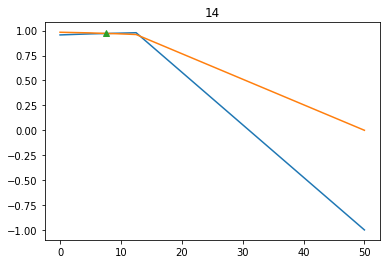

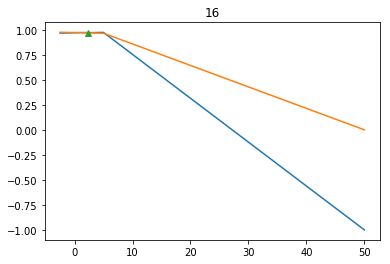

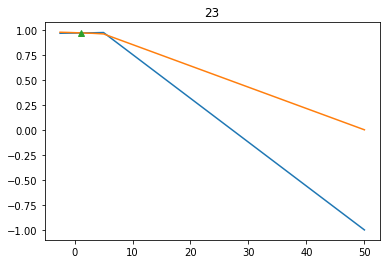

In [231]:
for objid in [11,12,14,16,23]:
    binary_search(sample, objid, algo,thresh,cluster_id="",exclude_isovote=False)

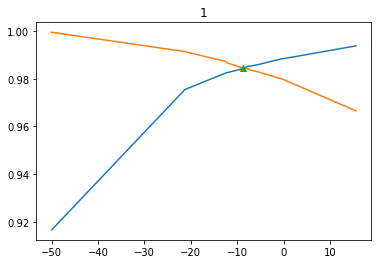

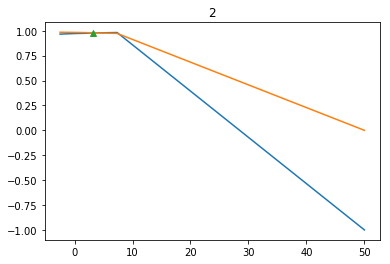

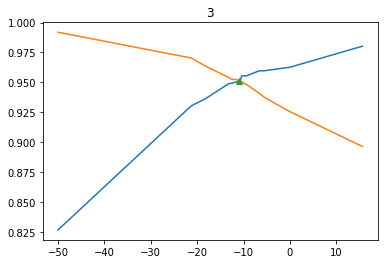

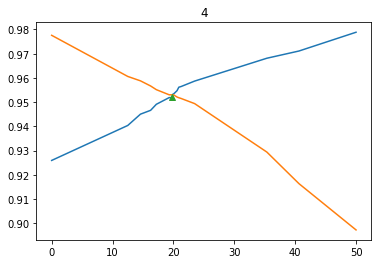

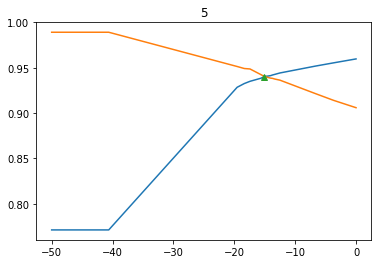

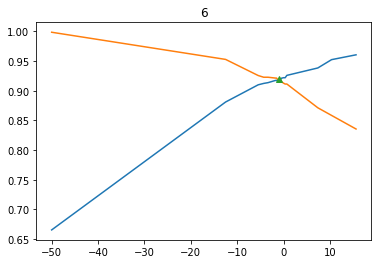

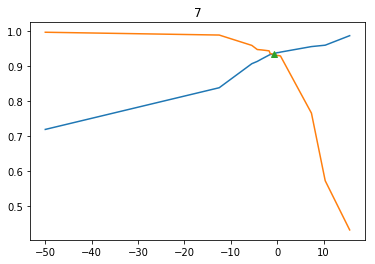

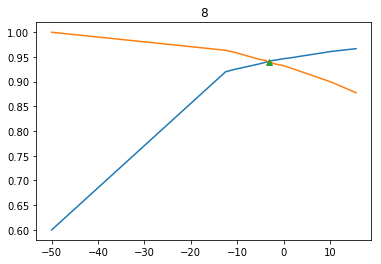

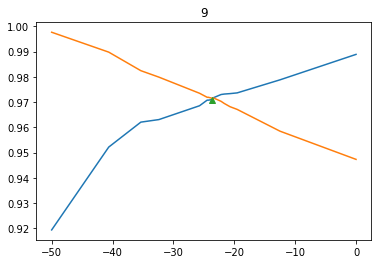

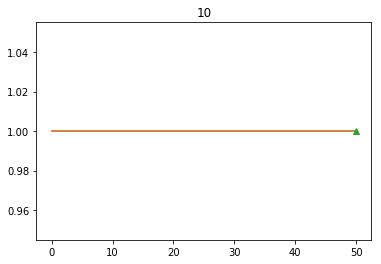

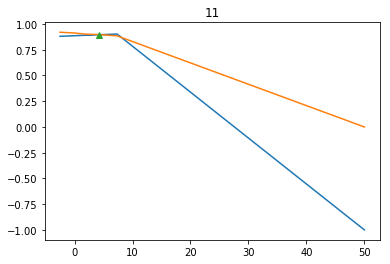

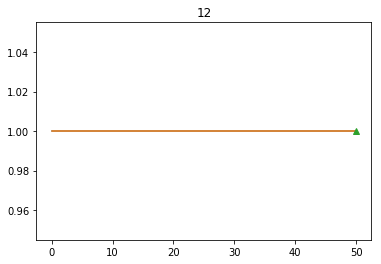

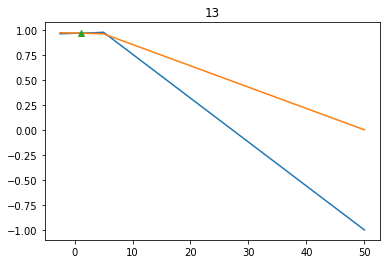

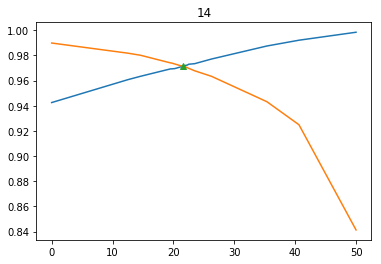

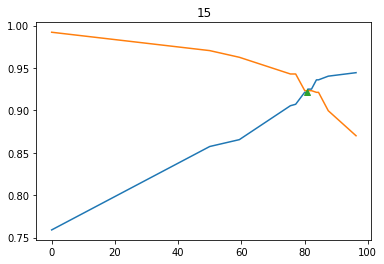

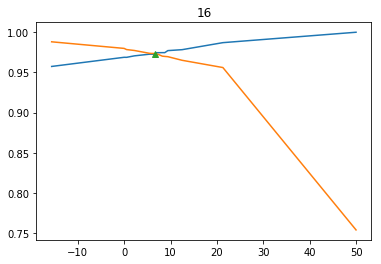

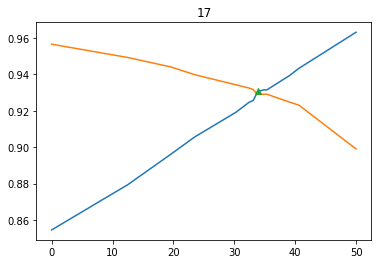

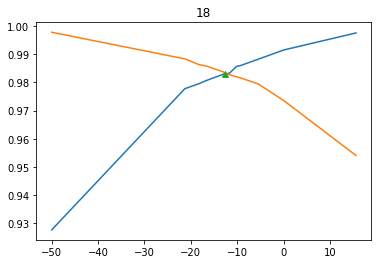

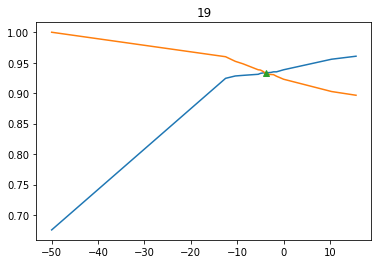

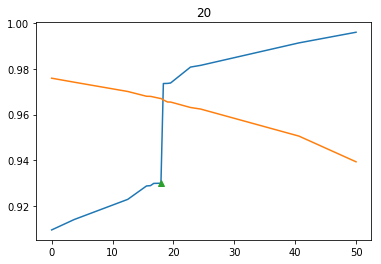

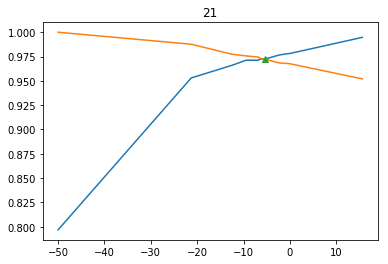

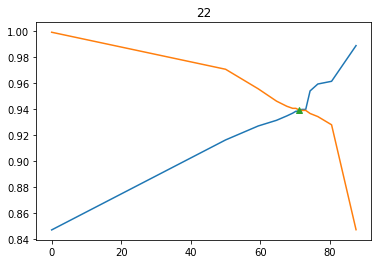

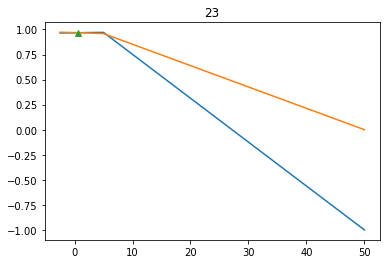

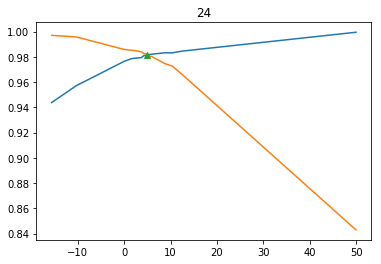

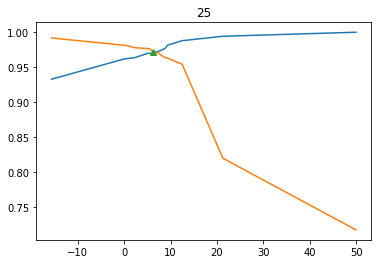

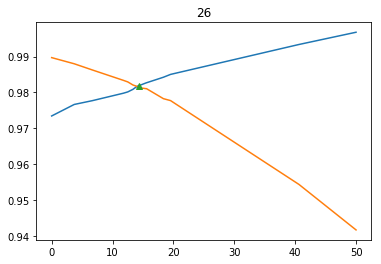

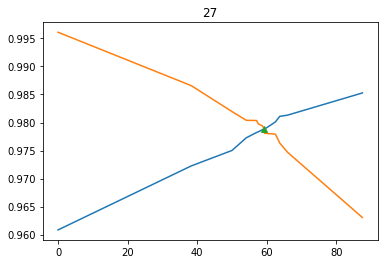

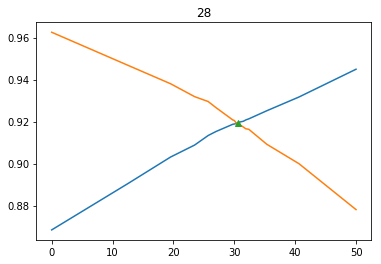

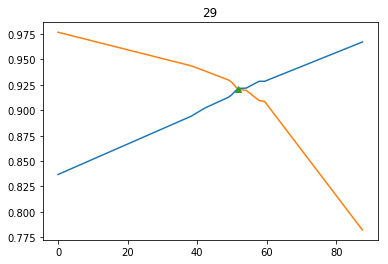

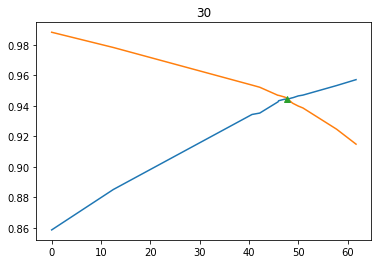

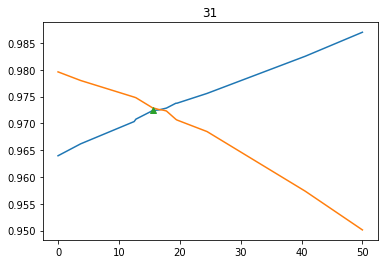

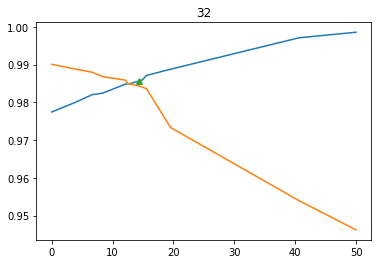

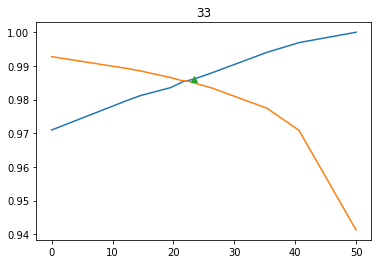

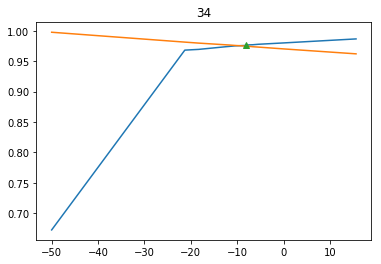

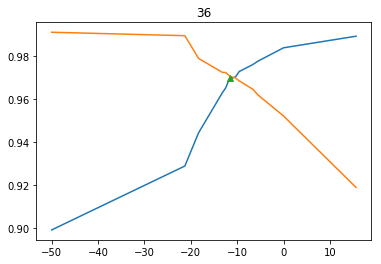

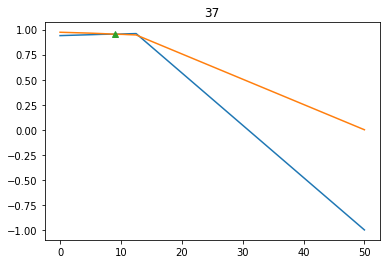

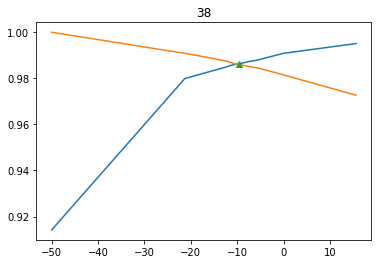

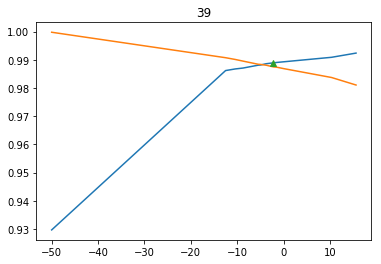

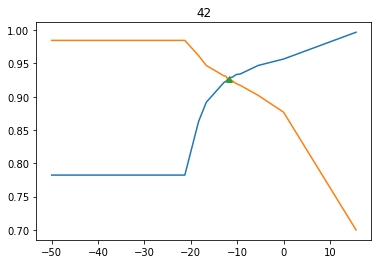

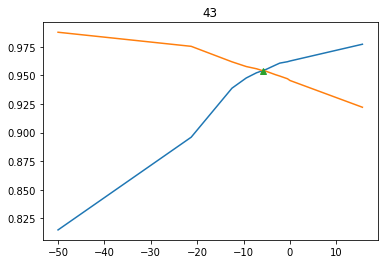

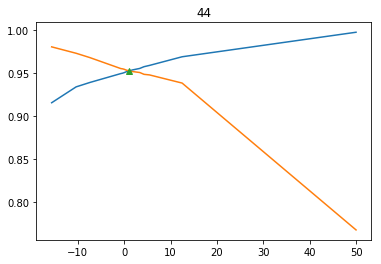

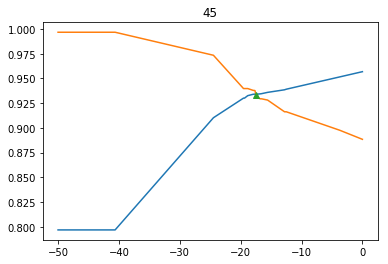

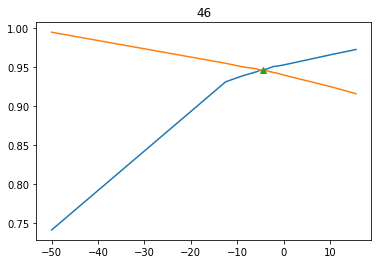

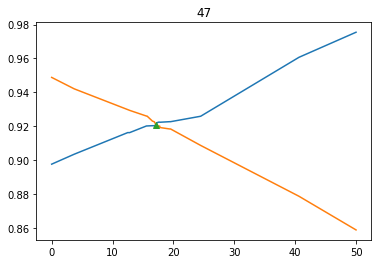

In [233]:
for objid in object_lst:
    binary_search("30workers_rand0", objid, algo,thresh,cluster_id="",exclude_isovote=False)

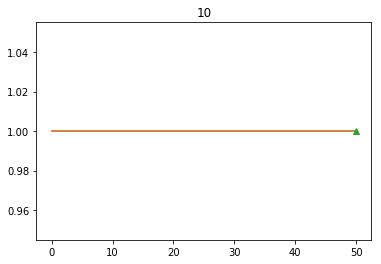

In [234]:
binary_search("30workers_rand0", 10, algo,thresh,cluster_id="",exclude_isovote=False)

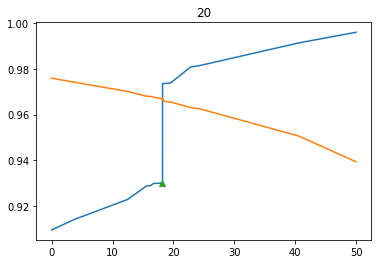

In [243]:
binary_search("30workers_rand0", 20, algo,thresh,cluster_id="",exclude_isovote=False)

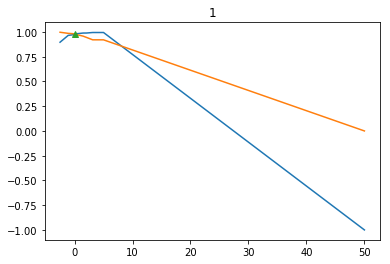

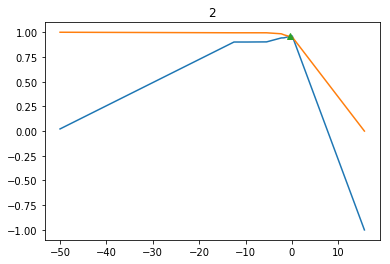

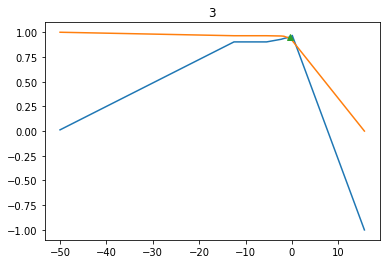

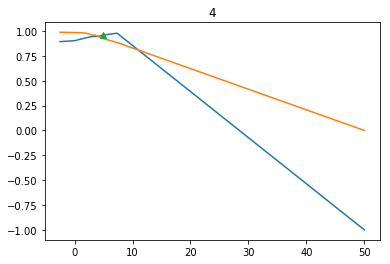

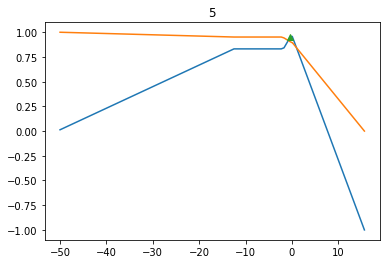

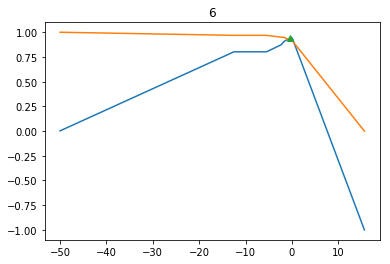

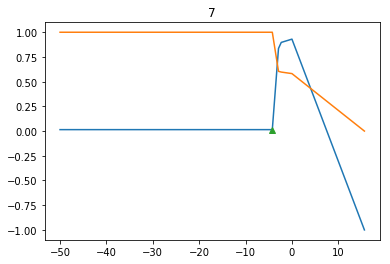

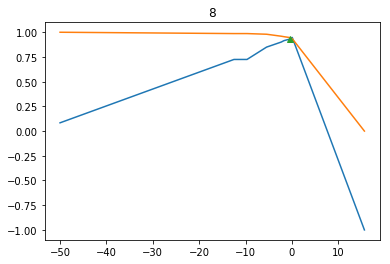

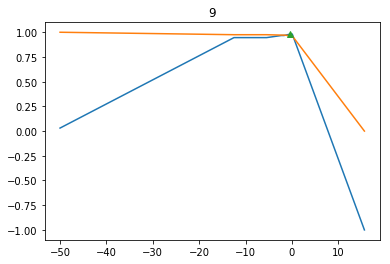

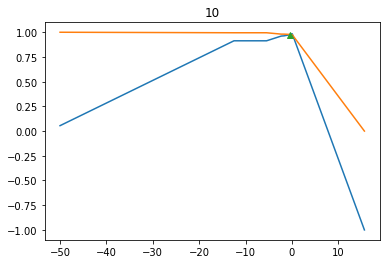

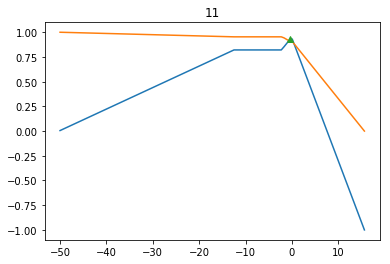

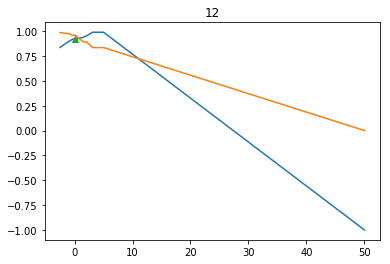

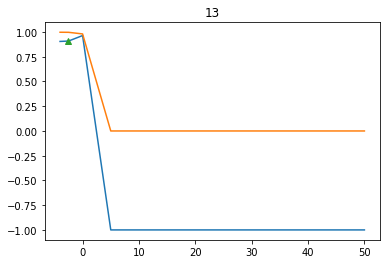

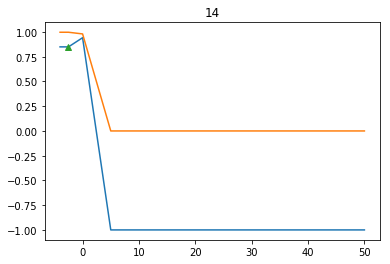

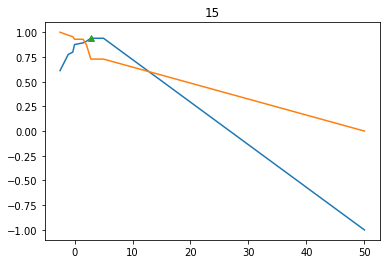

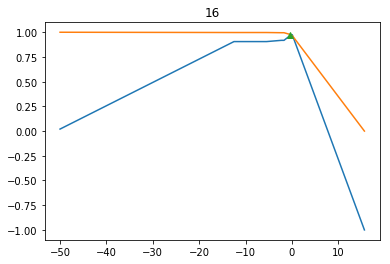

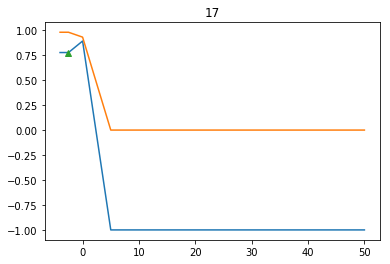

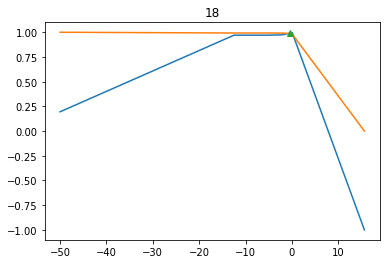

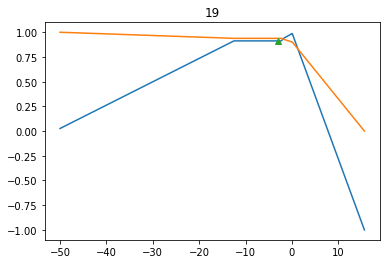

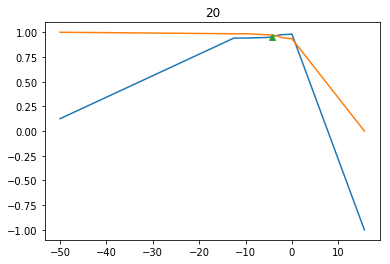

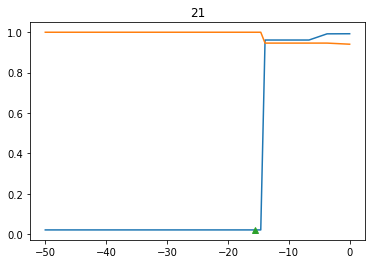

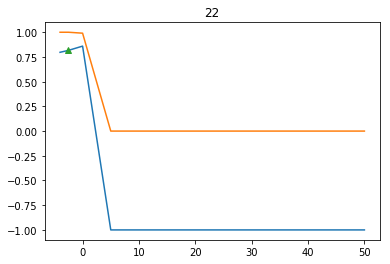

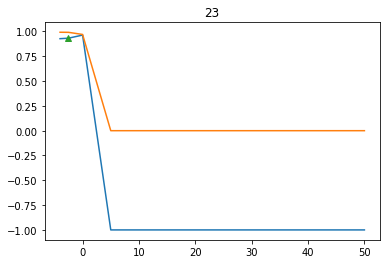

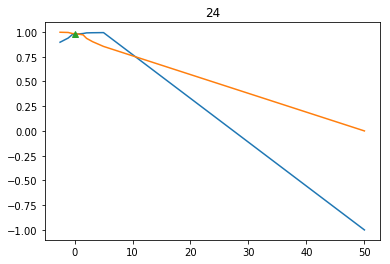

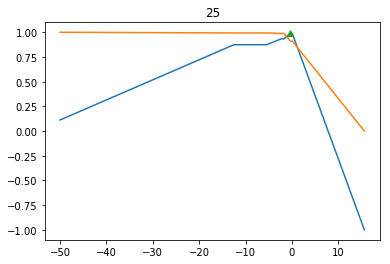

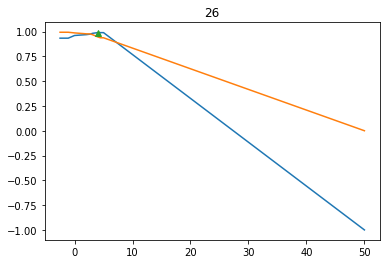

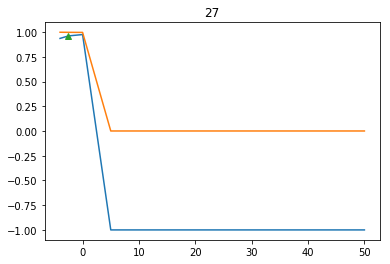

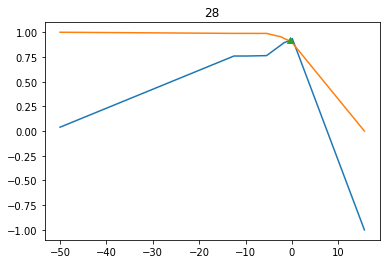

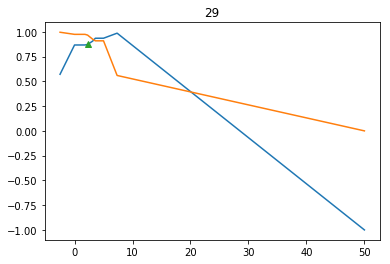

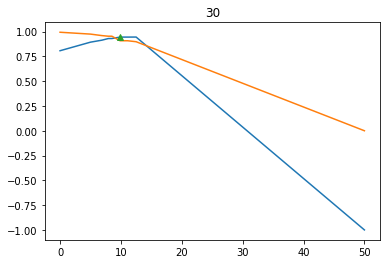

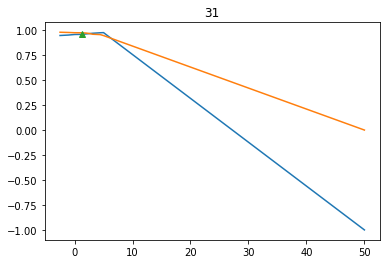

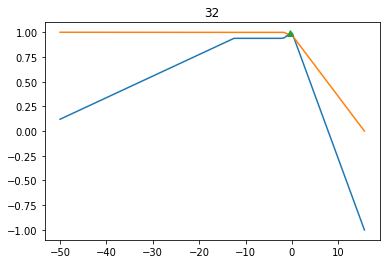

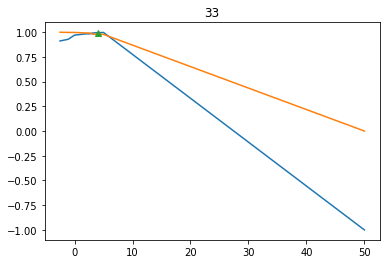

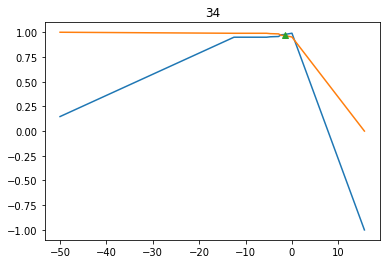

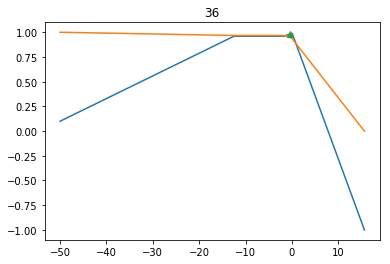

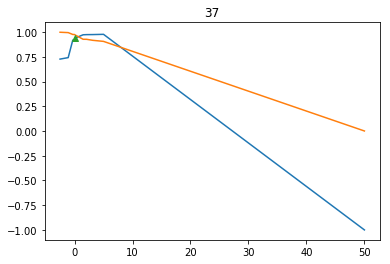

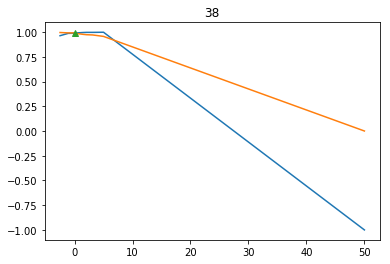

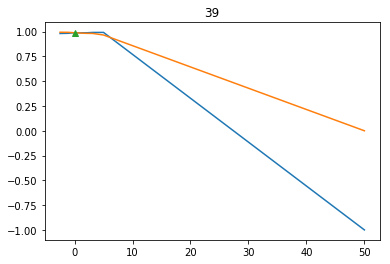

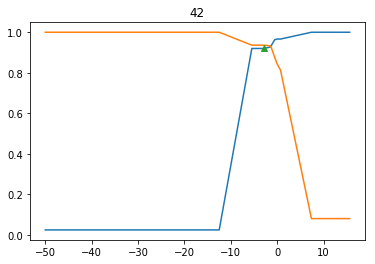

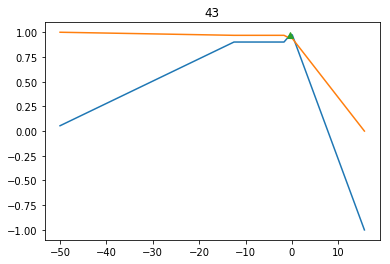

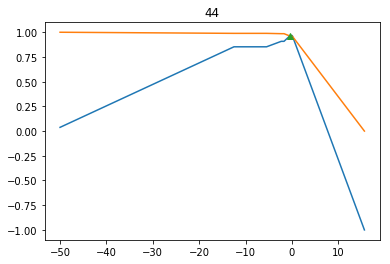

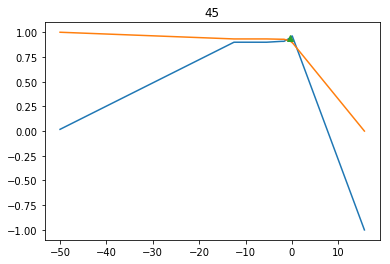

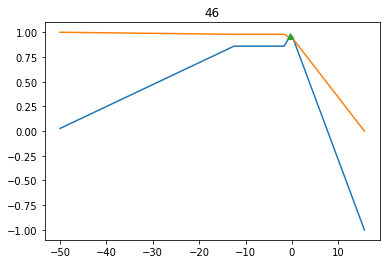

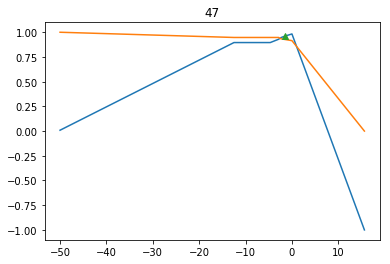

In [251]:
for objid in object_lst:
    binary_search("5workers_rand0", objid, algo,thresh,cluster_id="",exclude_isovote=False)

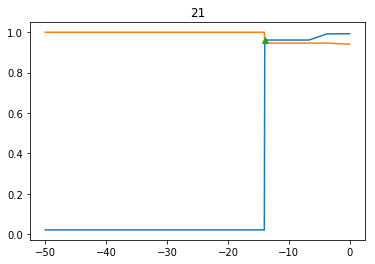

In [254]:
binary_search("5workers_rand0", 21, algo,thresh,cluster_id="",exclude_isovote=False)

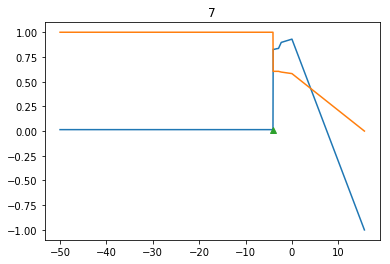

In [255]:
binary_search("5workers_rand0", 7, algo,thresh,cluster_id="",exclude_isovote=False)

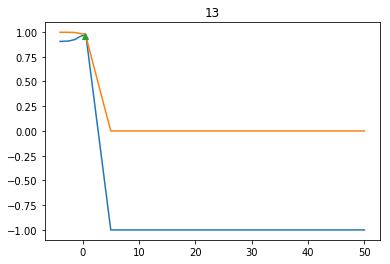

In [257]:
binary_search("5workers_rand0", 13, algo,thresh,cluster_id="",exclude_isovote=False)

In [275]:
def binary_search(sample, objid, algo,thresh,cluster_id="",exclude_isovote=False,rerun_existing=False):
    track = []
    thresh_min = -200
    thresh_max = 200
    if cluster_id!="" and cluster_id!=-1:
        outdir = '{}{}/obj{}/clust{}/'.format(PIXEL_EM_DIR, sample, objid,cluster_id)
    else:
        outdir = '{}{}/obj{}/'.format(PIXEL_EM_DIR, sample, objid)
    if exclude_isovote:
        mode ='iso'
    else:
        mode =''
    if (not rerun_existing) and os.path.exists('{}{}{}_ground_truth_EM_prj_best_thresh.json'.format(outdir,mode,algo)):
        print '{}{}{}_ground_truth_EM_prj_best_thresh.json'.format(outdir,mode,algo)+" already exist"
        return
    delta = np.abs(thresh_max -thresh_min)
#     p = 0
#     r = inf
#     prev_p =inf
#     prev_r = 0
    p,r =0,0 
    while (p==-1 or delta>1):
    #another possible stopping condition 
    #while (p==-1 or abs(prev_p-p)>1e-3 or abs(prev_r-r)>1e-3):
        prev_p = p
        prev_r = r
        thresh = (thresh_min+thresh_max)/2.
        #print "thresh:",thresh
        p,r,j = onlineDeriveGTinGroundTruthExperiments(sample, objid, algo,thresh,cluster_id=cluster_id,exclude_isovote=exclude_isovote,rerun_existing=True)
        
        delta = np.abs(thresh_max -thresh_min)
        if p>r:
            right = thresh_min + 0.75*delta  
            thresh_max = right
        else: 
            left = thresh_min + 0.25*delta  
            thresh_min = left
        if p==-1:
            #if p =-1 then it is because the result area is zero, which means nothing was selected for gt
            # this meant that the threshold has overshot
            thresh_max = thresh_min+0.2*delta
        track.append([i,thresh, p,r,j,thresh_min,thresh_max])
        #print "thresh min max:",thresh_min,thresh_max
        #print "p,r,j:",p,r,j
    track = np.array(track)
    deltas = np.abs(track[:,5]-track[:,4])
#     plt.figure()
#     plt.plot(deltas)
    idx = np.argsort(track[:,1])
    ths =track[:,1][idx] 
    ps = track[:,2][idx]
    rs = track[:,3][idx]
    ts = track[:,4][idx]
    plt.figure()
    plt.title(objid)
    plt.plot(ths,ps,label="p")
    plt.plot(ths,rs,label="r")
    plt.plot(ths,ts,label="j")
    plt.plot(track[-1][1],track[-1][2],'^')
    plt.legend(loc='lower left')
    outfile = '{}{}{}_ground_truth_EM_prj_best_thresh.json'.format(outdir,mode,algo,thresh)
    with open(outfile, 'w') as fp:
        fp.write(json.dumps([p, r, j]))
    return p,r,j

(0.014632161458333333, 1.0, 0.014632161458333333)

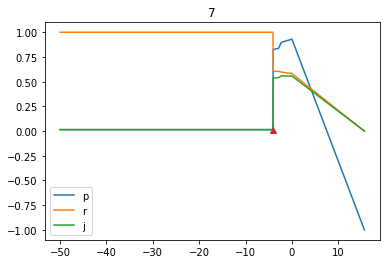

In [274]:
binary_search("5workers_rand0", 7, algo,thresh,cluster_id=-1,exclude_isovote=False,rerun_existing=True)

(0.8692421991084696, 0.6507230255839822, 0.5927051671732523)

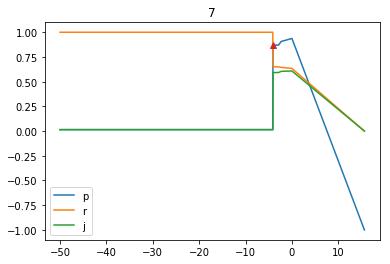

In [273]:
binary_search("5workers_rand0", 7, algo,thresh,cluster_id=0,exclude_isovote=False,rerun_existing=True)